# Exploratory Data Analysis (EDA) on Environmental Tax Revenues in Europe
**Reviewing trends in environmental taxes revenues in Europe for the period between 2009 and 2019.**

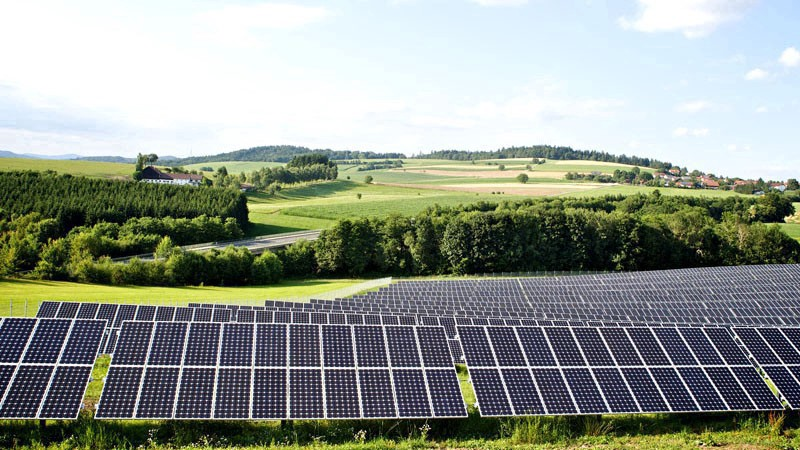

As the Russia-Ukraine crisis is prolonged, we faced record levels in commodity prices, especially oil and natural gas, all over the world but particularly in the European Union (EU) due to its heavy reliance on Russian fossil fuel sources. As a result of the embargoes imposed by the Western world against Russia, the energy markets were deeply affected and destabilized.

In addition to the economic and political effects, the war will also have critical consequences in terms of the climate crisis. As a matter of fact, the policies in the act or announced to be implemented by the EU, which has taken a leading role in climate change for many years and taken very brave steps, have brought along serious discussions.

The decisions to phase out coal, which were announced within the framework of the G20 at the end of last year and attributed to the COP26 margin, stood out as extremely positive developments in terms of combating climate change. But, as the tension between Russia and Ukraine escalated, the EU's strategy to combat the climate crisis changed considerably, as the EU took action to end its dependence on Russian resources. In this context, following the decision to classify nuclear and natural gas investments as sustainable investments within the framework of the EU Taxonomy, we've heard the countries' successive announcements of their nuclear and even coal strategies, and then some countries that want to protect their vulnerable households against high and unstable energy prices, take steps to relax their environmental tax policies have been the prominent developments of the recent period.

Among these policies, some EU countries preferred to reduce taxes on fossil fuels and give up their income, in order to protect negatively affected vulnerable households in this energy crisis conjuncture. Compromising this policy tool, which is used to create resources for green growth and green transformation, as a deterrent to abandoning fossil fuels and encouraging the transition to clean energy sources, will undoubtedly not help the climate crisis. In this respect, I believe that shedding light on the environmental tax revenues already gathered by European countries and going into details may reveal some fundamentals that we should consider in the coming period, as well as bring along some new policy proposals.

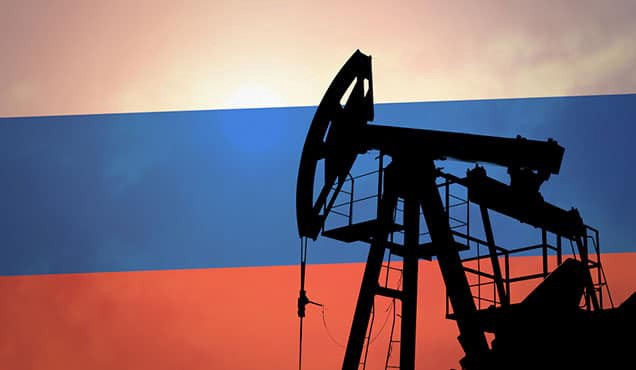

In this data analysis study, I will analyze environmental tax revenues in European countries for the period 2009–2019. My main aim will be to find the trends in environmental tax revenues in European countries over the last decade, by countries, by years, and also by different types of environmental tax revenues, to try to reveal which policy areas need to be carefully considered in the coming period. In my analysis, I decided to not refrain from the country selection solely with 27 EU member states but to cover all countries captured by Eurostat. In other words, the dataset consists of 27 EU member states, the United Kingdom (UK), 4 EFTA states, Serbia, and Turkey as EU candidate countries. 

In my work, I use the python software language and include some analytical applications including converting Eurostat data into geospatial data and mapping, data visualization, and pivot table analysis within the framework of this study. For this reason, I hope that the study will also help people working in the field of data analysis. 

For my other analysis, please feel free to visit my Medium page where you can also find more about the environmental global agenda and recent developments.

## Part I - Preparing Data for the Analysis

In [1]:
# Input data files are available in the "../input/" directory in the Kaggle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nuts2021/NUTS_BN_01M_2021_3857_LEVL_3.json
/kaggle/input/nuts2021/metadata.xml
/kaggle/input/nuts2021/NUTS_RG_01M_2021_3035_LEVL_2.json
/kaggle/input/nuts2021/NUTS_RG_01M_2021_4326_LEVL_1.json
/kaggle/input/nuts2021/NUTS_LB_2021_3035_LEVL_2.json
/kaggle/input/nuts2021/NUTS_LB_2021_4326_LEVL_1.json
/kaggle/input/nuts2021/NUTS_LB_2021_3035.json
/kaggle/input/nuts2021/NUTS_RG_01M_2021_3035_LEVL_3.json
/kaggle/input/nuts2021/NUTS_RG_01M_2021_3035_LEVL_1.json
/kaggle/input/nuts2021/NUTS_BN_01M_2021_3857_LEVL_2.json
/kaggle/input/nuts2021/NUTS_RG_01M_2021_3857_LEVL_0.json
/kaggle/input/nuts2021/NUTS_LB_2021_3857_LEVL_0.json
/kaggle/input/nuts2021/NUTS_LB_2021_3035_LEVL_1.json
/kaggle/input/nuts2021/NUTS_RG_01M_2021_4326_LEVL_3.json
/kaggle/input/nuts2021/NUTS_BN_01M_2021_3857_LEVL_0.json
/kaggle/input/nuts2021/NUTS_BN_01M_2021_4326_LEVL_0.json
/kaggle/input/nuts2021/NUTS_RG_01M_2021_3035.json
/kaggle/input/nuts2021/NUTS_RG_BN_01M_2021.csv
/kaggle/input/nuts2021/NUTS_BN_01M_2021

In [2]:
pip install eurostat #installing Eurostat package

     |████████████████████████████████| 45 kB 307 kB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 49 kB 1.5 MB/s            
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15145 sha256=28d2232addf452f356847e000614eb10a737b64fea386766c9aba3acefd728eb
  Stored in directory: /root/.cache/pip/wheels/58/88/2a/8d619cf38d7cf939e54b6ccdece05d31b64b3eb419c11d1ed3
Successfully built jsonpath-rw
Note: you may need to restart the kernel to use updated packages.


In [3]:
import eurostat #importing eurostat package
import pandas as pd # linear algebra
import numpy as np # data processing, CSV file

In [4]:
sourcedf = eurostat.get_toc_df() #querying Eurostat datasets
print(sourcedf) #printing the Eurostat datasets

                                                   title         code  \
0                                     Database by themes         data   
1                        General and regional statistics      general   
2      European and national indicators for short-ter...      euroind   
3       Business and consumer surveys (source: DG ECFIN)       ei_bcs   
4                    Consumer surveys (source: DG ECFIN)    ei_bcs_cs   
...                                                  ...          ...   
10678  People living in households with very low work...  ilc_lvhl16n   
10679  In-work at-risk-of-poverty rate by age and sex...     ilc_iw01   
10680  Severe housing deprivation rate by age, sex an...  ilc_mdho06a   
10681  Overcrowding rate by age, sex and poverty stat...  ilc_lvho05a   
10682  Housing cost overburden rate by age, sex and p...  ilc_lvho07a   

          type last update of data last table structure change data start  \
0       folder                                

In [5]:
taxrelatedsourcedf = eurostat.subset_toc_df(sourcedf, 'tax') #Looking for tax related datasets
print(taxrelatedsourcedf) #Printing tax related Eurostat datasets

                                                   title              code  \
1239            Table of taxes less subsidies on product    naio_10_cp1630   
1250   Table of taxes less subsidies on products (pre...   naio_10_pyp1630   
1299               Main national accounts tax aggregates     gov_10a_taxag   
1392   HICP at constant tax rates - monthly data (index)     prc_hicp_cind   
1393   HICP at constant tax rates - monthly data (ann...     prc_hicp_cann   
1394   HICP at constant tax rates - monthly data (mon...     prc_hicp_cmon   
3980                          Net earnings and tax rates          earn_net   
3983   Tax rate on low wage earners: Tax wedge on lab...  earn_nt_taxwedge   
3984                                            Tax rate   earn_nt_taxrate   
3985    Tax rate on low wage earners - Unemployment trap   earn_nt_unemtrp   
3986        Tax rate on low wage earners - Low wage trap   earn_nt_lowwtrp   
4899                                            Taxation        

## Part II - The Dataset

In this study, I used the data provided by Eurostat which collects data on environmental tax revenues by classifying their energy, transport, pollution, and resource taxes, and those are broken down by economic activity (taxpayers) using the NACE classification for production activities plus households and non-residents. The dataset subjected to my analysis was lastly updated on **January 18th, 2022.**





In [6]:
data_env_tax_with_nace = eurostat.get_data_df("env_ac_taxind2", flags = False) #Importing environmental tax revenues dataset for my analysis
print(data_env_tax_with_nace.sample(10)) #Printing 10 sample values in the dataset imported

       tax     unit  nace_r2   geo\time  2020       2019       2018  \
13666  POL  MIO_NAC      C21         LV  0.02       0.02       0.02   
5725   NRG  MIO_EUR      C21         SI  0.00       0.00       0.00   
3086   ENV  MIO_NAC      C21  EU27_2020   NaN     363.99        NaN   
16329  RES  MIO_EUR      C20         PL   NaN       0.09       0.10   
4790   ENV  MIO_NAC        O         CY   NaN       6.46       7.36   
12197  POL  MIO_EUR  J62_J63         NO   NaN       0.00       0.00   
11176  POL  MIO_EUR      C27         ES  0.40       0.50       0.40   
9170   NRG  MIO_NAC      H49         HU   NaN  142481.75  143273.46   
16531  RES  MIO_EUR      C26         FI   NaN       0.00       0.00   
16358  RES  MIO_EUR      C21         LI   NaN       0.00       0.00   

            2017       2016       2015  ...      2004      2003      2002  \
13666       0.00       0.04       0.04  ...       NaN       NaN       NaN   
5725        0.00       0.00       0.00  ...       NaN       NaN 

Environmental taxes are defined as energy taxes (including taxes on transport fuels), transport taxes, and 'dedicated' pollution taxes by the European Environment Agency. In the EUROSTAT source, the data between 1995 and 2020 is available. Moreover, the dataset was created to help us to find the taxes collected from different sources by country, as well as the NACE classifications.

It can be observed that the dataset was successfully imported and it consists of 30 columns. As the date range, I can access data between 1995 and 2020. Moreover, the dataset was created to help us to find the taxes collected from different sources by country, as well as the NACE codes. However, as can be seen, the dataset includes so many null values. That's why, for a concrete analysis, I need to clean the dataset and make it ready for analysis in line with my research questions.

First of all, since the dataset is very large, I want to explore the details some columns and remove them if I don't need them for the further analysis at least for a while. The dataset contains some string data in columns of 'unit', 'tax', 'nace_r2' and 'geo/time'. Before cleaning the data, I need to understand the unique values in each of columns. 

In [7]:
#For 'unit' column:
data_env_tax_with_nace["unit"].value_counts().sort_index() #Looking for how many different values in the column


MIO_EUR    13254
MIO_NAC    13254
Name: unit, dtype: int64

**MIO_EUR:** 'Million euro (EUR)'

**MIO_NAC:** 'Million units of national currency'

As it can be seen, this column consists of two unique string values; million EUR and million units of national currency. Since I am looking for a cross country analysis, I prefer to continue with rows including MIO_EUR values. 

In [8]:
#For 'tax' column:
data_env_tax_with_nace["tax"].value_counts().sort_index() #Looking for how many different values in the column
#'ENV': 'Total environmental taxes',
#'NRG': 'Energy taxes',
#'POL': 'Pollution taxes',
#'RES': 'Resource taxes',
#'TRA': 'Transport taxes',

ENV    5240
NRG    5242
POL    5388
RES    5398
TRA    5240
Name: tax, dtype: int64

According to the definitions provided by Eurostat;

**Energy taxes (NRG)** include taxes on energy products (e.g. coal, oil products, natural gas and electricity) used for both stationary purposes and transport purposes. 

**Transport (TRA)** taxes mainly include taxes related to the ownership and use of motor vehicles.

**Pollution (POL) and resource (RES)** taxes cover different types of taxes: taxes on the extraction of raw materials; on measured or estimated emissions to air (e.g. NOx, SO2) and water; on noise and on the management of waste.

I decide to keep all these categories here because I'll seek a compraison between different types of taxes in terms of their capabilities of revenue generation.

In [9]:
#For 'country' column:
#Since the column name of 'geo/time' is not readable correctly due to some reason, first I change its name with a readable string value
data_env_tax_with_nace.rename(columns = {list(data_env_tax_with_nace)[3]:'country'}, inplace=True) #Renaming geo/time column as country
data_env_tax_with_nace["country"].value_counts().sort_index() #Looking for how many different values in the column

AT           750
BE           750
BG           750
CH           706
CY           750
CZ           750
DE           750
DK           750
EA19         750
EE           750
EL           750
ES           750
EU27_2020    750
FI           750
FR           750
HR           750
HU           750
IE           750
IS           750
IT           750
LI           312
LT           750
LU           750
LV           750
MT           750
NL           750
NO           740
PL           750
PT           750
RO           750
RS           750
SE           750
SI           750
SK           750
TR           750
UK           750
Name: country, dtype: int64

In [10]:
countriestoexclude = data_env_tax_with_nace[(data_env_tax_with_nace["country"] == "EA19") | #Identifying values to be removed
                                            (data_env_tax_with_nace["country"] == "EU27_2020")].index 
data_env_tax_with_nace.drop(countriestoexclude, inplace=True) #Dropping out indentified values

For country codes, please refer to https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes.
In the data analysis, I prefer to remove regional classifications which are listed under the 'country' column in order to avoid misinterpretation due to aggregate values. Because of this reason I decide to remove 'EA19' and 'EU27_2020' rows from the dataset. 

In [11]:
#For 'nace_r2' column:
data_env_tax_with_nace["nace_r2"].value_counts().sort_index() #Looking for how many different values in the column
#eurostat.get_dic("nace_r2") command can be used to identifying NACE codes in our dataset

A                334
A01              334
A02              334
A03              334
B                334
                ... 
S96              334
T                326
TOTAL            334
TOTAL_HH_NRES    340
U                326
Name: nace_r2, Length: 75, dtype: int64

Per results of the last command, there are 75 NACE classifications in the dataset. In this analysis, I'll touch upon only main groups of NACE (Level 1). So, I'll keep only the main groupings which consist of a single letter but I'll filter my dataframe later on to this extent.

With this column, I finished to understand the context of each string column. Before moving on at this stage, limiting years with 2009 to 2019 seems a good opportunity not only to increase the simplicity of the dataset but also a good way to rename and reorder the years which are sorted reversly as default. 


In [12]:
data_env_tax_with_nace.isnull().sum() #Sorting the null values for each year

tax            0
unit           0
nace_r2        0
country        0
2020       16698
2019         358
2018         384
2017         372
2016         372
2015         392
2014         372
2013         368
2012         402
2011         420
2010         426
2009         384
2008         380
2007       14148
2006       14442
2005       15902
2004       16058
2003       16062
2002       16796
2001       16796
2000       16800
1999       17632
1998       17632
1997       17632
1996       18220
1995       18074
dtype: int64

It is also important to note that I would like to disregard 2020 data because of too much null values which are currently not provided by the countries to the EUROSTAT. 

In [13]:
data_env_tax_with_nace.columns = data_env_tax_with_nace.columns.astype(str) #Ensuring all column names are string
data_env_tax_with_nace = data_env_tax_with_nace[(data_env_tax_with_nace["unit"] == "MIO_EUR")] #To ease the analysis, mainstreaming of the dataset with units equal to million Euro would be usefull
column_names = ["country", 
                "tax", 
                "nace_r2", 
                "2009", 
                "2010", 
                "2011", 
                "2012", 
                "2013", 
                "2014", 
                "2015", 
                "2016", 
                "2017", 
                "2018", 
                "2019"] #Reordering year columns and removing unnecessary ones
data_env_tax_with_nace = data_env_tax_with_nace.reindex(columns=column_names) #Redefining index values
data_env_tax_with_nace.round(2) #Rounding decimals with 2 digits
print(data_env_tax_with_nace.sample(10)) #Printing 10 sample rows in the dataframe

      country  tax  nace_r2   2009   2010   2011   2012   2013   2014   2015  \
21349      ES  TRA      A02   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
5594       CY  NRG      C18   0.24   0.46   0.28   0.32   0.30   0.24   0.26   
11504      HR  POL  E37-E39   0.00   0.01   0.00   0.00   0.00   0.00   0.00   
20         LT  ENV        A  35.66  34.23  38.36  41.72  24.35  38.85  62.83   
12076      FI  POL      J58   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
12618      HU  POL      N79   0.00   0.00   0.00   0.00   0.00   0.00   0.01   
11567      DE  POL  EP_NRES   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
6788       ES  NRG      J58   6.60   6.20   5.70   5.00   5.80   5.50   6.20   
23106      MT  TRA  M69_M70   0.41   0.40   0.51   0.51   0.51   0.51   0.61   
22124      IE  TRA      C33   0.54   0.98   1.48   1.77   3.31   3.47   4.30   

        2016   2017   2018   2019  
21349   0.00   0.00   0.00   0.00  
5594    0.30   0.36   0.38   0.35  
11504   0.0

Last but not least, I'd like to check whether there is a null value in dataframe. 

In [14]:
data_env_tax_with_nace.isnull().sum() #Checking the null values for analysis period

country      0
tax          0
nace_r2      0
2009       192
2010       213
2011       210
2012       201
2013       184
2014       186
2015       196
2016       186
2017       186
2018       192
2019       179
dtype: int64

In the dataframe, there is considerable amount of null values. If I don't find a way to address this issue, this could be misleading for the further part of my analysis. Due to this fact, I prefer to assume these values are not reported and to replace these null values with '0' at this stage.

In [15]:
data_env_tax_with_nace = data_env_tax_with_nace.replace(np.nan, 0) #Replacing null values with '0'

In [16]:
data_env_tax_with_nace.isnull().sum() #Checking the dataframe for null values

country    0
tax        0
nace_r2    0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
dtype: int64

Voila. I successfully get rid of null values. Now I can look at the details of latest version of the dataset.

In [17]:
data_env_tax_with_nace.describe() #Describing statistics for the dataframe

2009          2010          2011          2012          2013  \
count  12504.000000  12504.000000  12504.000000  12504.000000  12504.000000   
mean     146.037366    157.036615    164.544071    170.687613    175.282488   
std     1397.530341   1463.684823   1534.189240   1612.375614   1632.364549   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.590000      0.640000      0.680000      0.700000      0.695000   
75%       10.730000     11.952500     12.555000     12.542500     13.120000   
max    55300.040000  55159.910000  58647.280000  58184.710000  57937.310000   

               2014          2015          2016          2017          2018  \
count  12504.000000  12504.000000  12504.000000  12504.000000  12504.000000   
mean     179.096643    187.893564    190.092933    191.285123    192.191981   
std     1677.625037   1755.489334   1763.495292   1760.491750   1780.238577   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.760000      0.820000      0.855000      0.870000      0.870000   
75%       13.442500     14.405000     14.862500     14.880000     15.450000   
max    58282.000000  63868.080000  59481.000000  59249.700000  59724.000000   

               2019  
count  12504.000000  
mean     195.873856  
std     1808.094701  
min        0.000000  
25%        0.000000  
50%        0.875000  
75%       15.200000  
max    61112.710000

As the table above shows that the data is quite manageable. Since it includes the 'Total' values for both tax types and NACE codes, for now I'll skip making comments on the dataframe.

In [18]:
data_env_tax_with_nace.info() #Showing brief info on the specifications of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12504 entries, 0 to 23887
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  12504 non-null  object 
 1   tax      12504 non-null  object 
 2   nace_r2  12504 non-null  object 
 3   2009     12504 non-null  float64
 4   2010     12504 non-null  float64
 5   2011     12504 non-null  float64
 6   2012     12504 non-null  float64
 7   2013     12504 non-null  float64
 8   2014     12504 non-null  float64
 9   2015     12504 non-null  float64
 10  2016     12504 non-null  float64
 11  2017     12504 non-null  float64
 12  2018     12504 non-null  float64
 13  2019     12504 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.4+ MB


At this moment, I need to create different dataframes with various filters to use in my analysis. Firstly, I'd like to create dataframe for a broad analysis. My filters for this dataframe are million EUR as 'unit', total environmental tax revenues as 'tax' and total for the 'nace_2' column.

In [19]:
#The dataframe that I will use for the broad analysis: 'tax_revenues_broad'
tax_revenues_broad = data_env_tax_with_nace[(data_env_tax_with_nace["tax"] == "ENV") & #Filtering for Total Environmental Taxes and Total of NACE R2
                                            (data_env_tax_with_nace["nace_r2"] == "TOTAL")] 
tax_revenues_broad = tax_revenues_broad.loc[:, ~tax_revenues_broad.columns.isin(['tax', 'nace_r2'])]#Excluding tax and nace columns which are not necesarry for this analysis
print(tax_revenues_broad) #Printing the dataframe

     country      2009      2010      2011      2012      2013      2014  \
2515      AT   3110.54   2463.36   2550.60   2537.69   2494.91   2518.07   
2516      BE   4428.98   4045.36   4561.87   4774.47   4751.67   4619.72   
2517      BG    698.28    585.91    666.45    692.83    794.82    772.19   
2518      CH   1996.18   2381.70   2637.88   2661.66   2595.15   2628.14   
2519      CY    176.24    182.15    184.39    159.71    144.95    150.85   
2520      CZ   2730.17   2864.22   3081.09   2855.83   2619.80   2673.91   
2521      DE  22053.54  22412.81  25286.93  25157.34  24654.75  22973.80   
2522      DK   4062.96   4142.37   4387.38   4372.05   4517.72   4697.75   
2524      EE    267.93    285.52    310.37    343.74    342.45    386.50   
2525      EL   2691.17   2922.63   2888.56   3252.38   3647.77   3643.16   
2526      ES   6982.80   7200.80   6966.30   6842.90   9012.80   8807.00   
2528      FI   2398.72   2679.17   3266.87   3308.72   3184.93   3121.37   
2529      FR

Last step that we need to do is improve the dataset to ease the analysis. For this purpose, I want to merge all years column into one instead of separate columns. 

In [20]:
tax_revenues_broad_final = tax_revenues_broad.melt(id_vars='country', #Converting our dataframe into more appropriate way to be analyzed based on country data for 11 years
                                                   var_name='year', 
                                                   value_name='tax_revenues') 
print(tax_revenues_broad_final.sample(10)) #Printing a sample from dataframe

    country  year  tax_revenues
227      SI  2015        569.31
167      BG  2014        772.19
67       BE  2011       4561.87
219      MT  2015        112.19
267      CH  2017       3331.89
73       DK  2011       4387.38
292      SE  2017       4658.62
51       LT  2010        247.20
308      FI  2018       3471.16
63       SK  2010        990.76


The first dataframe for the broad analysis is ready. 

The second dataframe is used for analysing different types of taxes which I'll use it to measure their revenue generation capabilities.

In [21]:
#The dataframe that I will use for analysing different types of taxes: 'revenues_tax_based'
revenues_tax_based = data_env_tax_with_nace[(data_env_tax_with_nace["tax"] != "ENV") & #Filtering by non-ENV values and NACE codes
                                            (data_env_tax_with_nace["nace_r2"] == "TOTAL")] 
print(revenues_tax_based) #Printing dataframe

      country  tax nace_r2     2009     2010     2011     2012     2013  \
7756       AT  NRG   TOTAL  2546.44  1818.58  1878.72  1843.34  1805.01   
7757       BE  NRG   TOTAL  3191.05  2834.39  3259.32  3518.30  3481.65   
7758       BG  NRG   TOTAL   590.60   492.52   590.54   620.43   713.46   
7759       CH  NRG   TOTAL  1460.69  1728.44  1922.19  1951.54  1905.27   
7760       CY  NRG   TOTAL   125.60   133.83   140.30   120.34   113.55   
...       ...  ...     ...      ...      ...      ...      ...      ...   
23813      SE  TRA   TOTAL   516.01   566.98   578.37   595.98   651.82   
23814      SI  TRA   TOTAL    54.31    55.15    50.25    51.61    52.16   
23815      SK  TRA   TOTAL   134.64   141.64   155.16   153.48   180.43   
23816      TR  TRA   TOTAL   923.68  1234.28  1416.26  1548.37  1639.71   
23817      UK  TRA   TOTAL  2762.25  3347.01  4010.35  4882.16  4872.48   

          2014     2015     2016     2017     2018     2019  
7756   1763.93  1788.22  1634.97  180

For this dataframe, I don't need the NACE classification, so I drop it out. 

In [22]:
revenues_tax_based = revenues_tax_based.loc[:, revenues_tax_based.columns!='nace_r2'] #Excluding nace column which is not necesarry for this analysis

I melt all year relevant columns into single column.

In [23]:
revenues_tax_based_final = revenues_tax_based.melt(id_vars=('country', 'tax'), #Converting our dataframe into more appropriate way to be analyzed based on country data for 11 years
                                                   var_name='year', 
                                                   value_name='tax_revenues') 
print(revenues_tax_based_final.sample(10)) #Printing a sample from dataframe

     country  tax  year  tax_revenues
164       SK  NRG  2010        811.84
495       PT  RES  2012          7.17
1097      PT  NRG  2017       1814.16
322       LV  POL  2011          8.22
711       EE  POL  2014         43.94
1068      SI  TRA  2016         53.77
760       NL  RES  2014        109.00
787       IS  TRA  2014         34.21
921       IS  TRA  2015         44.73
1007      BG  RES  2016         19.66


In [24]:
revenues_tax_based_final_pivot = pd.pivot_table(revenues_tax_based_final, #Creating a pivot table to conduct analysis in a more efficient way
                                                index = ("country", "year"), 
                                                columns = 'tax') 
print(revenues_tax_based_final_pivot) #Printing pivot table 

             tax_revenues                          
tax                   NRG      POL     RES      TRA
country year                                       
AT      2009      2546.44    57.30    0.00   506.81
        2010      1818.58    50.88    0.00   593.91
        2011      1878.72    52.81    0.00   619.07
        2012      1843.34    53.10    0.00   641.25
        2013      1805.01    53.20    0.00   636.70
...                   ...      ...     ...      ...
UK      2015     28799.80  1416.30  487.71  6480.35
        2016     26458.24  1249.57  494.22  5835.41
        2017     25480.10  1031.17  427.76  5300.05
        2018     26420.76   951.72  413.69  5119.08
        2019     27475.14   893.17  451.14  5280.43

[374 rows x 4 columns]


The last dataframe that I generate is for showing the differences among main NACE groups in terms of environmental tax revenues. To do this it is necessary to filter main groups in NACE codes.

In [25]:
#The dataframe that I will use for the nace analysis: 'revenues_nace_based'

#Filtering out of values including numeric values for which column NACE_R2 and values of NAL and TOTAL
criteria = data_env_tax_with_nace[(data_env_tax_with_nace["nace_r2"].str.isalpha()==False) | #Filtering for keeping just the main NACE R2 categories
                                  (data_env_tax_with_nace["nace_r2"] == "NAL") | 
                                  (data_env_tax_with_nace["nace_r2"] == "TOTAL") | 
                                  (data_env_tax_with_nace["nace_r2"].isna()==True)].index 
revenues_nace_based = data_env_tax_with_nace.drop(criteria)#Deleting these row indexes from dataframe
revenues_nace_based["nace_r2"].value_counts().sort_index() #Checking the last version of 'nace_r2' column

A    167
B    167
C    167
D    167
E    167
F    167
G    167
H    167
I    167
L    167
O    167
P    167
T    163
U    163
Name: nace_r2, dtype: int64

#### Decoding NACE Rev.2 Sections and their descriptions

* A: Agriculture, forestry and fishing
* B: Mining and quarrying 
* C: Manufacturing
* D: Electricity, gas, steam and air conditioning supply  
* E: Water supply, sewerage, waste management and remediation activities
* F: Construction
* G: Wholesale and retail trade; repair of motor vehicles and motorcycles 
* H: Transporting and storage
* I: Accommodation and food service activities
* L: Real estate activities
* O: Public administration and defence; compulsory social security
* P: Education
* T: Activities of households as employers; undifferentiated goods, and services producing activities of households for own use 
* U: Activities of extraterritorial organisations and bodies 

###### Source: https://ec.europa.eu/eurostat/documents/3859598/5902521/KS-RA-07-015-EN.PDF    
    

As I've made for the previous dataframes, I'd like to merge all year columns into one instead of separate columns. 

In [26]:
revenues_nace_based_final = revenues_nace_based.melt(id_vars=('country', 'tax', 'nace_r2'), #Converting our dataframe into more appropriate way to be analyzed based on country data for 11 years
                                                     var_name='year', 
                                                     value_name='tax_revenues') 
print(revenues_nace_based_final) #Printing the dataframe

      country  tax nace_r2  year  tax_revenues
0          AT  ENV       A  2009        254.87
1          BE  ENV       A  2009         36.82
2          BG  ENV       A  2009         51.68
3          CH  ENV       A  2009        139.19
4          CY  ENV       A  2009          2.40
...       ...  ...     ...   ...           ...
25625      SE  TRA       U  2019          0.00
25626      SI  TRA       U  2019          0.00
25627      SK  TRA       U  2019          0.00
25628      TR  TRA       U  2019          0.00
25629      UK  TRA       U  2019          0.00

[25630 rows x 5 columns]


For this dataframe since there are lots of descriptive information for each country, it is better to use a pivot table.

In [27]:
revenues_nace_based_final_pivot = pd.pivot_table(revenues_nace_based_final, index = ("country","tax", "nace_r2", "year"), values = 'tax_revenues') #Creating a pivot table to conduct analysis in a more efficient way
revenues_nace_based_final_pivot #Printing pivot table

tax_revenues
country tax nace_r2 year              
AT      ENV A       2009        254.87
                    2010        114.33
                    2011        130.61
                    2012        130.71
                    2013        129.09
...                                ...
UK      TRA U       2015          0.00
                    2016          0.00
                    2017          0.00
                    2018          0.00
                    2019          0.00

[25630 rows x 1 columns]

## Part III - Snapshot for Enviromental Tax Revenues in Europe

Before starting to analyze the data, I need to import other relevant python libraries.

In [28]:
import seaborn as sns #Importing seaborn package
import matplotlib #Importing matplotlib package
import matplotlib.pyplot as plt #Importing plt in the matplotlib package

matplotlib.style.use('fivethirtyeight') #Selecting the style which will be use for graphs as default
plt.rcParams["figure.figsize"] = [10, 6] #Selecting the figure size which will be use for graphs as default
%config InlineBackend.figure_format = 'retina' # Set up with a higher resolution screen (optional)

In [29]:
print(tax_revenues_broad) #Looking at the dataframe for analysing

     country      2009      2010      2011      2012      2013      2014  \
2515      AT   3110.54   2463.36   2550.60   2537.69   2494.91   2518.07   
2516      BE   4428.98   4045.36   4561.87   4774.47   4751.67   4619.72   
2517      BG    698.28    585.91    666.45    692.83    794.82    772.19   
2518      CH   1996.18   2381.70   2637.88   2661.66   2595.15   2628.14   
2519      CY    176.24    182.15    184.39    159.71    144.95    150.85   
2520      CZ   2730.17   2864.22   3081.09   2855.83   2619.80   2673.91   
2521      DE  22053.54  22412.81  25286.93  25157.34  24654.75  22973.80   
2522      DK   4062.96   4142.37   4387.38   4372.05   4517.72   4697.75   
2524      EE    267.93    285.52    310.37    343.74    342.45    386.50   
2525      EL   2691.17   2922.63   2888.56   3252.38   3647.77   3643.16   
2526      ES   6982.80   7200.80   6966.30   6842.90   9012.80   8807.00   
2528      FI   2398.72   2679.17   3266.87   3308.72   3184.93   3121.37   
2529      FR

In [30]:
tax_revenues_broad.describe() #Describing our data for analysing briefly

2009          2010          2011          2012          2013  \
count     33.000000     33.000000     33.000000     33.000000     33.000000   
mean    4423.152121   4784.286667   5136.677273   5363.983333   5575.536364   
std     5977.916931   6490.958013   7154.234323   7738.154398   7965.911467   
min       49.180000     65.950000     71.090000     68.770000     77.230000   
25%      617.520000    585.910000    602.160000    563.570000    641.070000   
50%     2031.440000   2381.700000   2550.600000   2537.690000   2494.910000   
75%     4428.980000   4444.040000   4669.750000   4774.470000   4751.670000   
max    22053.540000  22412.810000  25286.930000  27420.810000  28437.530000   

               2014          2015          2016          2017          2018  \
count     33.000000     33.000000     33.000000     33.000000     33.000000   
mean    5668.760303   5956.268788   5981.089394   6035.467576   6130.183030   
std     8212.288673   8722.126487   8506.005559   8464.510815   8673.759086   
min      100.680000    112.190000    108.820000    117.710000    129.280000   
25%      707.010000    789.710000    833.630000    912.170000   1011.680000   
50%     2628.140000   2722.750000   2912.740000   2982.240000   3164.230000   
75%     4697.750000   4812.990000   5480.920000   5666.500000   5953.830000   
max    31877.440000  37184.160000  34037.440000  32239.080000  32905.260000   

               2019  
count     33.000000  
mean    6312.904848  
std     8869.646928  
min      143.880000  
25%     1052.100000  
50%     3402.050000  
75%     6132.600000  
max    34099.890000

According to the data description table, it can be observed that average environmental tax revenues increased by approximately 45% on average over 11 years in 33 European countries. Additionally, it is possible to notice a continuous upward trend in the average amount of tax revenues within this period. However, both of the min. and max. amounts of revenues generated from environmental taxes don't follow a straight trend in these years.

I reached a finding that the value of the lowest tax revenues collected during this period increased from 49 million EUR to 144 million EUR, while the value of the highest collected tax revenues increased from 22,053 million EUR to 34,100 million EUR.

Another important point I would like to touch upon is that the increase rate of the tax revenues in the lowest 25% has been almost 70% in the last 11 years, while it has increased by almost 40% in the countries in the 75% quintile with the highest tax income.

To compare the revenues coming from environmental taxes changes at the beginning of the period and at the end, I prepare a graph that shows simply number of countries and the amount of generated revenues.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


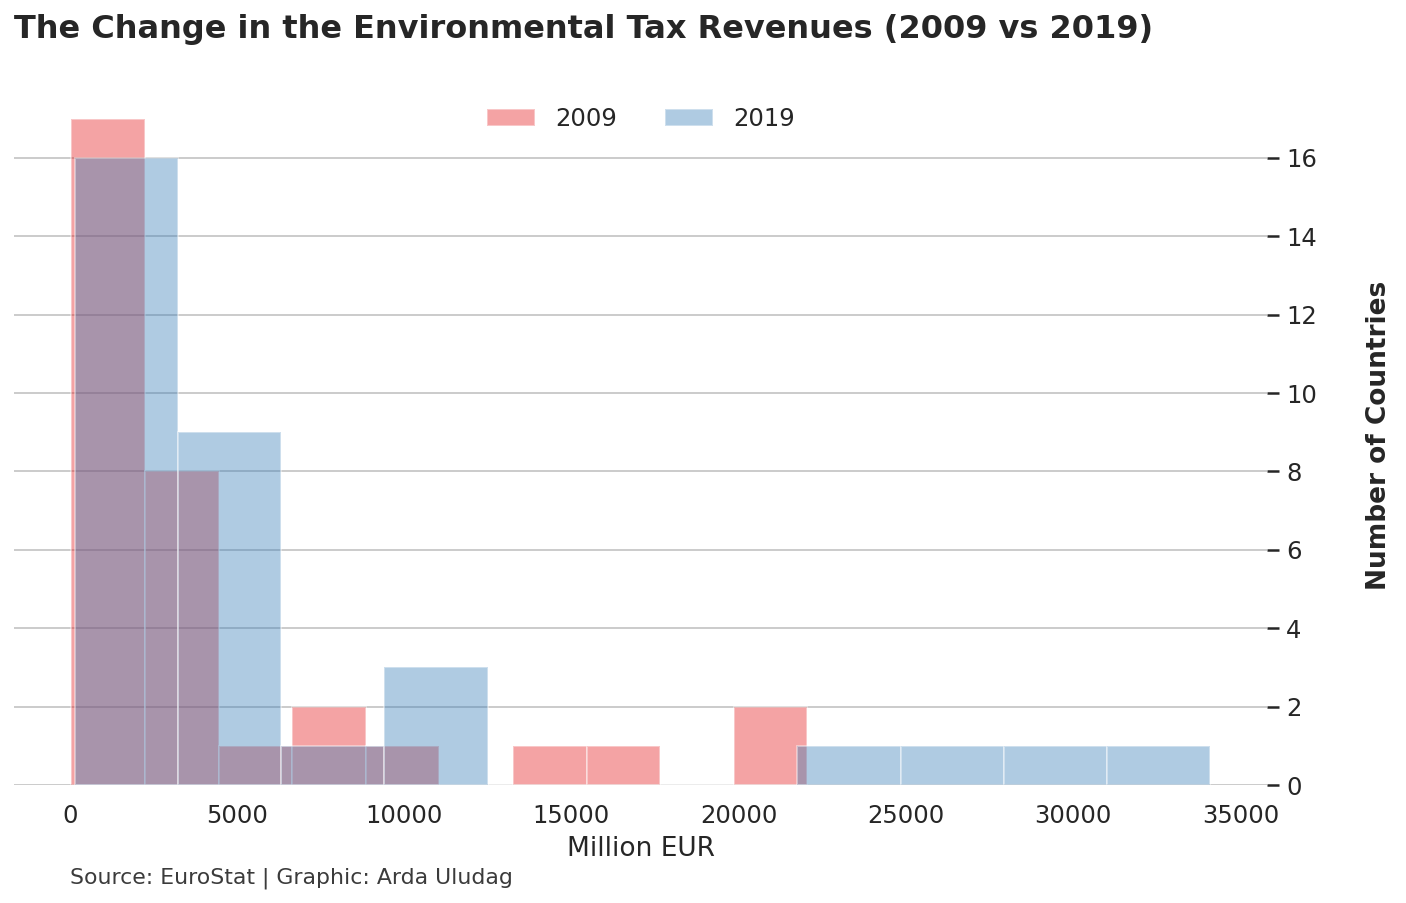

In [31]:
sns.set(style='whitegrid', #Setting up the seaborn chart specifications
        palette="Set1", 
        font_scale=1.1, 
       ) 

sns.distplot(tax_revenues_broad['2009'], #Defining first data and its labels
             norm_hist=False, 
             kde=False).set(xlabel='', ylabel='') 
sns.distplot(tax_revenues_broad['2019'], #Defining second data and its labels
             norm_hist=False, 
             kde=False).set(xlabel='', 
                            ylabel='') 

plt.title("The Change in the Environmental Tax Revenues (2009 vs 2019)", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.legend(labels=["2009","2019"], loc='upper center', ncol=2, frameon=False) #Setting up legend specifications
plt.xlabel("Million EUR") #Naming x-label
plt.ylabel("Number of Countries", weight='bold') #Naming y-label
ax = plt.gca() #Setting up visual improvements
ax.xaxis.grid() #Leaving only horizontal lines
ax.yaxis.set_label_coords(1.10,0.5) #Repositioning y axis label
ax.yaxis.tick_right() #Repositioning yaxis ticks
plt.box(on=None) #Removing the box of the chart
plt.text(-0.5, -2.5, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)
plt.show()

On the other hand, the chart presented above shows us; that in 2009, most of the countries subjected to the analysis generated a relatively low amount of tax revenue compared to 2019. While the highest amount of revenues realized in 2009 is around 20–22.5 billion EUR coming from 2 countries, in 2019 there are at 4 countries that collected environmental tax revenues above 22.5 billion EUR. Furthermore, the highest amount of tax revenue in 2019 is around 35 billion EUR. In brief, by just looking at the first and the last years, it is possible to state that there is an improvement in terms of environmental tax revenues.

Now I would like to go in deep into the analysis and do some basic statistical computations. In this sense, I calculate the average, minimum and maximum amounts of tax revenues generated within the whole period for each country.

In [32]:
#Extending the country based analysis
tax_revenues_broad_final_1 = tax_revenues_broad_final.groupby(['country']).agg({'tax_revenues': ['mean', 'min', 'max']}) #Calculating aggregate mean, min and max values for each country within the whole period
tax_revenues_broad_final_1.columns = ['taxrev_mean', 'taxrev_min', 'taxrev_max'] #Defining calculation columns
tax_revenues_broad_final_1 = tax_revenues_broad_final_1.round(1).sort_values(by="taxrev_mean",ascending=False).reset_index() #Sorting values with respect to mean tax revenues
tax_revenues_broad_final_1.head(5) #Printing dataframe
tax_revenues_broad_final_1.tail(5) #Printing 

country  taxrev_mean  taxrev_min  taxrev_max
28      LT        351.2       247.2       513.7
29      LU        314.0       290.5       371.2
30      CY        181.2       145.0       234.1
31      IS        113.8        49.2       172.3
32      MT         97.4        66.0       143.9

The tables above show us, that the highest and lowest amounts of environmental tax revenue generated in a year is realized in the UK in this period. On average the least amount of revenue was collected in Malta (MT). For this period, the minimum tax collected in a year is in Iceland (IS), while the highest is in the UK as well. On average the UK is followed by Germany (DE), Italy (IT), France (FR), and Turkey (TR).

To show the distribution of tax revenues generated among countries for each statistics, I use the boxplot.

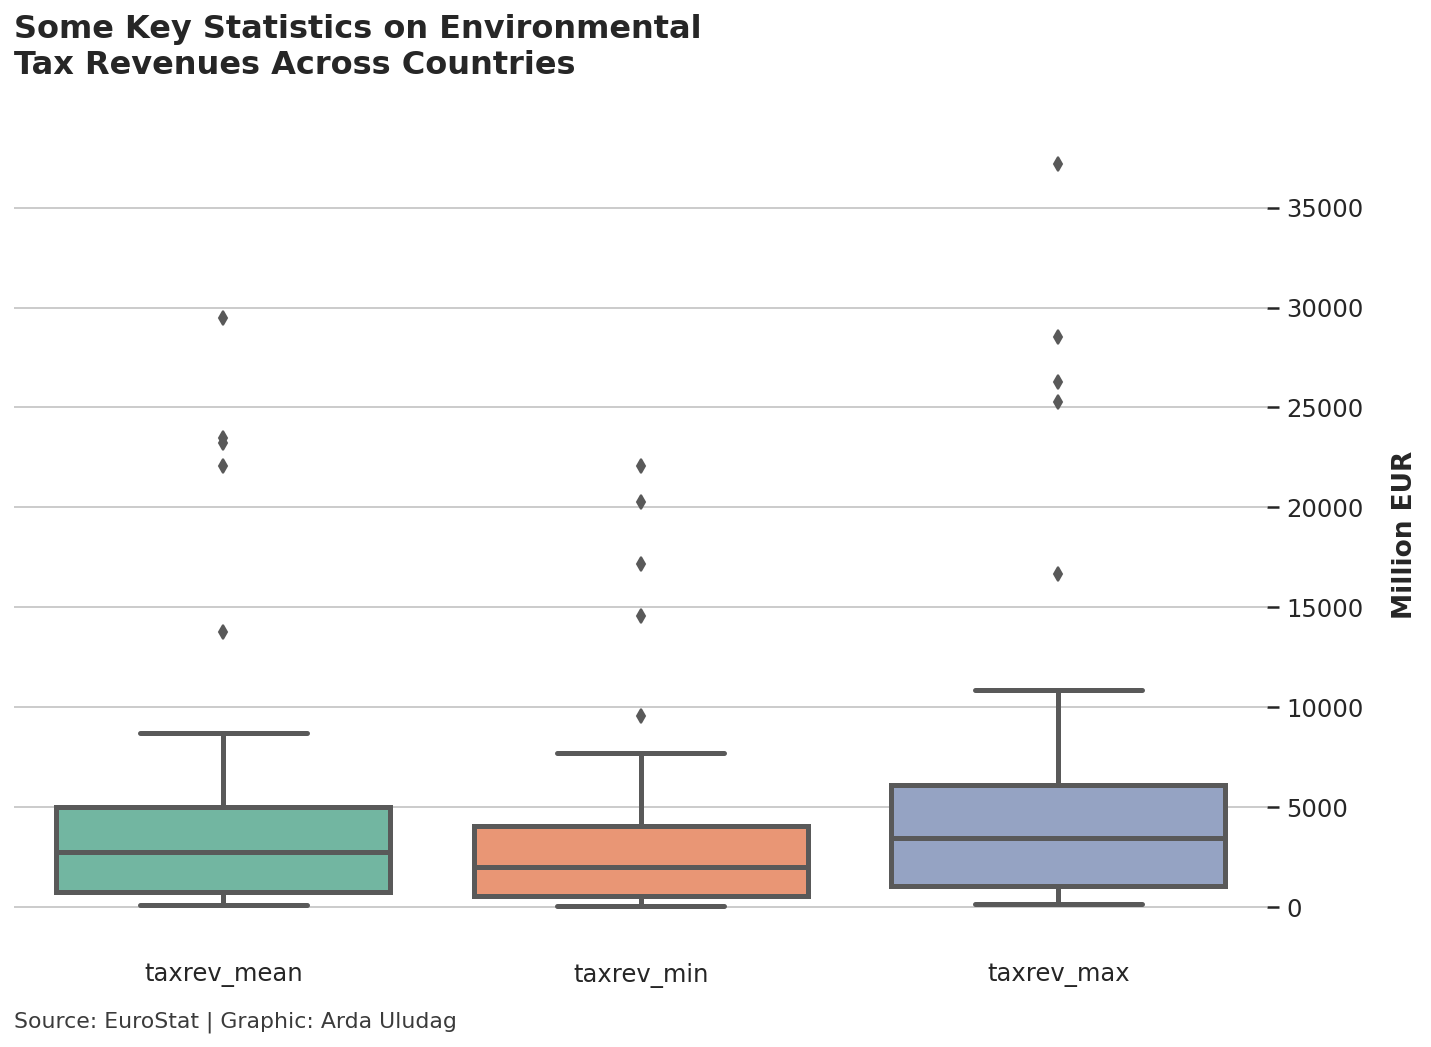

In [33]:
fig = plt.figure(figsize=(10,7), 
           tight_layout=False)  #Setting the figure shape for boxplot
ax = sns.boxplot(data=tax_revenues_broad_final_1, 
                 palette='Set2', 
                 linewidth=2.5) #Setting the details for boxplot
plt.title("Some Key Statistics on Environmental \nTax Revenues Across Countries", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.box(on=None) #Removing the box of the chart
ax.yaxis.set_label_coords(1.12,0.5)
ax.yaxis.tick_right()
plt.text(-0.5, -6000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)
plt.show() #Printing the chart

According to the boxplot chart, the mean value of tax revenues is closer to the 25% quartile which means that most countries cannot generate a high amount of tax revenue from environmental charges. The median value for the mean is well below 5 million EUR within 11 years period. There are also 5 countries with average tax revenues higher than 10 billion EUR but in the boxplot chart, it is easy to see that those are outliers. In other words, these countries outperformed relative to the others. Outliers' performance is the same in other statistics.

After looking at countries' performance, let's move on to the differences between years.

In [34]:
#Analyzing year based data
tax_revenues_broad_final_2 = tax_revenues_broad_final.groupby(['year']).agg({'tax_revenues': ['mean', 'min', 'max']}) #Calculating aggregate mean, min and max values for each country
tax_revenues_broad_final_2.columns = ['taxrev_mean', 'taxrev_min', 'taxrev_max'] #Defining calculation columns
tax_revenues_broad_final_2 = tax_revenues_broad_final_2.round(1).reset_index() #Sorting values with respect to mean tax revenues
print(tax_revenues_broad_final_2)

    year  taxrev_mean  taxrev_min  taxrev_max
0   2009       4423.2        49.2     22053.5
1   2010       4784.3        66.0     22412.8
2   2011       5136.7        71.1     25286.9
3   2012       5364.0        68.8     27420.8
4   2013       5575.5        77.2     28437.5
5   2014       5668.8       100.7     31877.4
6   2015       5956.3       112.2     37184.2
7   2016       5981.1       108.8     34037.4
8   2017       6035.5       117.7     32239.1
9   2018       6130.2       129.3     32905.3
10  2019       6312.9       143.9     34099.9


By looking at the table, as I've already indicated in the data frame description, it can be seen that the minimum amount of environmental tax revenues increased almost 3 times in these years. Within this period, I observe upward trends in mean and maximum values as well. Let's graph them to see the case much better.

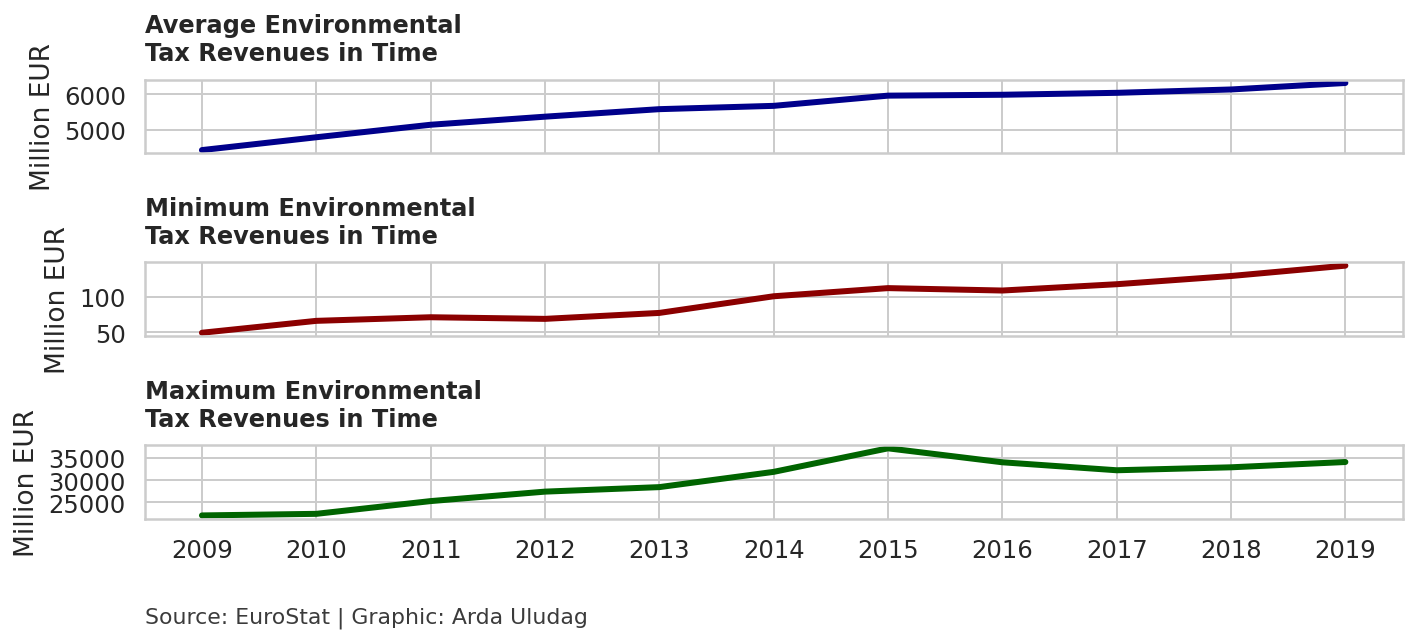

In [35]:
fig, (ax1,ax2, ax3) =plt.subplots(nrows=3, sharex=True, tight_layout=True) #Setting up the seaborn for creating 3 chart together

sns.set(style='whitegrid', #Setting up the seaborn chart specifications
        palette="Set1", 
        font_scale=1.0) 

sns.lineplot(y = 'taxrev_mean', 
             x = 'year', 
             data = tax_revenues_broad_final_2, 
             ax=ax1, color='darkblue', linewidth=3)
ax1.set_title('Average Environmental \nTax Revenues in Time', 
          fontsize=12, 
          weight='bold', loc='left', y=1.1)
ax1.set_ylabel('Million EUR')
ax1.set_xlabel('')


sns.lineplot(y = 'taxrev_min', 
             x = 'year', 
             data = tax_revenues_broad_final_2, 
             ax=ax2, color='darkred', linewidth=3)
ax2.set_title('Minimum Environmental \nTax Revenues in Time', 
          fontsize=12, 
          weight='bold', loc='left', y=1.1)
ax2.set_ylabel('Million EUR')
ax2.set_xlabel('')


sns.lineplot(y = 'taxrev_max', 
             x = 'year', 
             data = tax_revenues_broad_final_2, 
             ax=ax3, color='darkgreen', linewidth=3)
ax3.set_title('Maximum Environmental \nTax Revenues in Time', 
          fontsize=12, 
          weight='bold', loc='left', y=1.1)
ax3.set_ylabel('Million EUR')
ax3.set_xlabel('')
plt.text(-0.5, -2000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

plt.show()

It is crystal clear that in each line chart, there is an upward trend but of course, their magnitude is completely different. The only difference is in the maximum statistic in which the amounts generated reached their peak level in 2015 and it is struggling to reach the same level in the following years.

In brief, in 11 years, between 2009 and 2019, all the countries have made significant progress in generating environmental tax revenues. However, tax revenues above the 15 billion EUR have still required an extra effort because according to the statistical analysis the countries which have successfully achieved this threshold are performed as outliers.

I believe at this point mapping the environmental taxes for each country year by year would be a good way to get the gist of the analysis.

### Mapping the Data

To map our data first I need to import required libraries. Mapping the data is quite time consuming and requires a pile of codes, so if you are not interested the coding part, feel free to pass through the map to continue to read the analysis.

To start my mapping practice, the first data I need is NUTS2021 data provided by Eurostat. By using this data I'll get the required geolocation information for the European countries. Here is the [link](http://https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts) for the data and more. In my analysis I just need country boundries so the '0' level data is adequate for me.

In [36]:
pip install geopandas #installing geopandas package

Note: you may need to restart the kernel to use updated packages.


In [37]:
import geopandas as gpd #importing geopandas package
import contextily as cx #importing contextily package

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [38]:
gdf_rg = gpd.read_file("../input/nuts2021/NUTS_RG_01M_2021_3035_LEVL_0.json") #Importing the NUTS2021 dataset which I already uploaded to the platform.
print(gdf_rg) #Looking briefly our NUTS level data to decide which elements we need to keep

    id NUTS_ID  LEVL_CODE CNTR_CODE                NAME_LATN  \
0   CZ      CZ          0        CZ                    Česko   
1   DE      DE          0        DE              Deutschland   
2   DK      DK          0        DK                  Danmark   
3   AL      AL          0        AL                Shqipëria   
4   CY      CY          0        CY                   Kýpros   
5   BG      BG          0        BG                 Bulgaria   
6   AT      AT          0        AT               Österreich   
7   BE      BE          0        BE          Belgique/België   
8   EE      EE          0        EE                    Eesti   
9   EL      EL          0        EL                   Elláda   
10  ES      ES          0        ES                   España   
11  FI      FI          0        FI            Suomi/Finland   
12  FR      FR          0        FR                   France   
13  HR      HR          0        HR                 Hrvatska   
14  CH      CH          0        CH  Sch

In this dataset, I need 'id' and 'geometry' columns to get geographical information.

In [39]:
gdf_rg = gdf_rg[["id","geometry"]] #Select subset of data required

I also need to add longtitude and latitude data for each country in the dataframe.

In [40]:
gdf_rg["lat"] = "" #Creating a column for latitude
gdf_rg["lon"] = ""#Creating a column for longitude

In [41]:
pip install geopy #Installing geopy package

Note: you may need to restart the kernel to use updated packages.


In [42]:
from geopy.geocoders import Nominatim #Importing Nominatim element from geopy package

geolocator = Nominatim(user_agent="myApp") #Building the function to get longitude and latitude data for each country

for i in gdf_rg.index:
        try: 
                location = geolocator.geocode(gdf_rg["id"][i])
                
                gdf_rg.loc[i, "lat"] = location.latitude
                gdf_rg.loc[i, "lon"] = location.longitude
        except: 
            gdf_rg.loc[i, "lat"] = ""
            gdf_rg.loc[i, "lon"] = ""
print(gdf_rg)

    id                                           geometry        lat  \
0   CZ  POLYGON ((4635759.251 3113259.280, 4636316.243...    49.8167   
1   DE  MULTIPOLYGON (((4355220.961 2715901.981, 43541...  51.163818   
2   DK  MULTIPOLYGON (((4650503.156 3591342.705, 46503...  55.670249   
3   AL  MULTIPOLYGON (((5129581.780 2204099.420, 51298...  33.258882   
4   CY  MULTIPOLYGON (((6527041.873 1762366.921, 65267...  34.982302   
5   BG  POLYGON ((5330612.196 2430820.059, 5332042.901...  42.607397   
6   AT  MULTIPOLYGON (((4355220.961 2715901.981, 43566...   47.59397   
7   BE  MULTIPOLYGON (((3980660.242 3157892.288, 39782...  50.640281   
8   EE  MULTIPOLYGON (((5209286.239 4151086.809, 52101...  58.752378   
9   EL  MULTIPOLYGON (((6083861.928 1676463.152, 60836...  38.915304   
10  ES  MULTIPOLYGON (((3815026.120 1904966.963, 38157...  39.326068   
11  FI  MULTIPOLYGON (((5073773.369 5207014.607, 50708...  63.246778   
12  FR  MULTIPOLYGON (((9981287.654 -3029241.553, 9982...  46.60

After getting geometries of each European countries, I have find a base map on which I plot my data. To do this I may import data from a github source by using 'request' library.

In [43]:
pip install requests #Installing request package to get map data

Note: you may need to restart the kernel to use updated packages.


In [44]:
import requests #Importing requests package
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json" #Defining the json file location
response = requests.get(geojson_url) #Using the requests to get the json data
geojson = response.json() #Using respose to define downloaded json file as geojson
geojson['features'][40] #Looking at the details of geojson

{'type': 'Feature',
 'properties': {'name': 'Czech Republic'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[16.960288, 48.596982],
    [16.499283, 48.785808],
    [16.029647, 48.733899],
    [15.253416, 49.039074],
    [14.901447, 48.964402],
    [14.338898, 48.555305],
    [13.595946, 48.877172],
    [13.031329, 49.307068],
    [12.521024, 49.547415],
    [12.415191, 49.969121],
    [12.240111, 50.266338],
    [12.966837, 50.484076],
    [13.338132, 50.733234],
    [14.056228, 50.926918],
    [14.307013, 51.117268],
    [14.570718, 51.002339],
    [15.016996, 51.106674],
    [15.490972, 50.78473],
    [16.238627, 50.697733],
    [16.176253, 50.422607],
    [16.719476, 50.215747],
    [16.868769, 50.473974],
    [17.554567, 50.362146],
    [17.649445, 50.049038],
    [18.392914, 49.988629],
    [18.853144, 49.49623],
    [18.554971, 49.495015],
    [18.399994, 49.315001],
    [18.170498, 49.271515],
    [18.104973, 49.043983],
    [17.913512, 48.996493],
    [17.886485, 48.9034

At this point the geojson data that I imported requires full name of the countries for mapping them correctly. I can see this information by looking at the features of the data above. Therefore, I have to convert the 2-Letter names of countries into full names for this purpose. 

In [45]:
pip install country-converter #Installing country name converter because our map data consists of original names of countries instead of 2-Letter codes. 

     |████████████████████████████████| 50 kB 485 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for country-converter: filename=country_converter-0.7.4-py3-none-any.whl size=53543 sha256=991178f7d7cbdb4d1259ad86750a152e32fed5790069ef0e5766837b9680e129
  Stored in directory: /root/.cache/pip/wheels/69/cf/84/9ebca78737327440a0bb5faa6d0380e9017730534cf0dbcb8c
Successfully built country-converter
Note: you may need to restart the kernel to use updated packages.


In [46]:
import country_converter as coco #Importing coco module from country_converter package
cc = coco.CountryConverter() 

tax_revenues_broad_final['name'] = cc.convert(names = tax_revenues_broad_final["country"], #Converting country names from 2-letter codes to short name
                                              to = 'name_short') 
tax_revenues_broad_final.loc[tax_revenues_broad_final["country"] == "UK", "name"] = "United Kingdom" #Fixing not converted values manually
tax_revenues_broad_final.loc[tax_revenues_broad_final["country"] == "EL", "name"] = "Greece" #Fixing not converted values manually
print(tax_revenues_broad_final) #printing data

    country  year  tax_revenues            name
0        AT  2009       3110.54         Austria
1        BE  2009       4428.98         Belgium
2        BG  2009        698.28        Bulgaria
3        CH  2009       1996.18     Switzerland
4        CY  2009        176.24          Cyprus
..      ...   ...           ...             ...
358      SE  2019       4498.67          Sweden
359      SI  2019        633.62        Slovenia
360      SK  2019       1439.29        Slovakia
361      TR  2019       9545.51          Turkey
362      UK  2019      34099.89  United Kingdom

[363 rows x 4 columns]


In [47]:
tax_revenues_broad_final_map = pd.merge(tax_revenues_broad_final, #Merging geographical data with the environmental tax revenues data
                                        gdf_rg, 
                                        left_on='country', 
                                        right_on='id') 
print(tax_revenues_broad_final_map) #Printing data

    country  year  tax_revenues            name  id  \
0        AT  2009       3110.54         Austria  AT   
1        AT  2010       2463.36         Austria  AT   
2        AT  2011       2550.60         Austria  AT   
3        AT  2012       2537.69         Austria  AT   
4        AT  2013       2494.91         Austria  AT   
..      ...   ...           ...             ...  ..   
358      UK  2015      37184.16  United Kingdom  UK   
359      UK  2016      34037.44  United Kingdom  UK   
360      UK  2017      32239.08  United Kingdom  UK   
361      UK  2018      32905.26  United Kingdom  UK   
362      UK  2019      34099.89  United Kingdom  UK   

                                              geometry        lat       lon  
0    MULTIPOLYGON (((4355220.961 2715901.981, 43566...   47.59397  14.12456  
1    MULTIPOLYGON (((4355220.961 2715901.981, 43566...   47.59397  14.12456  
2    MULTIPOLYGON (((4355220.961 2715901.981, 43566...   47.59397  14.12456  
3    MULTIPOLYGON (((435522

In [48]:
print(tax_revenues_broad_final_map) #Printing data

    country  year  tax_revenues            name  id  \
0        AT  2009       3110.54         Austria  AT   
1        AT  2010       2463.36         Austria  AT   
2        AT  2011       2550.60         Austria  AT   
3        AT  2012       2537.69         Austria  AT   
4        AT  2013       2494.91         Austria  AT   
..      ...   ...           ...             ...  ..   
358      UK  2015      37184.16  United Kingdom  UK   
359      UK  2016      34037.44  United Kingdom  UK   
360      UK  2017      32239.08  United Kingdom  UK   
361      UK  2018      32905.26  United Kingdom  UK   
362      UK  2019      34099.89  United Kingdom  UK   

                                              geometry        lat       lon  
0    MULTIPOLYGON (((4355220.961 2715901.981, 43566...   47.59397  14.12456  
1    MULTIPOLYGON (((4355220.961 2715901.981, 43566...   47.59397  14.12456  
2    MULTIPOLYGON (((4355220.961 2715901.981, 43566...   47.59397  14.12456  
3    MULTIPOLYGON (((435522

In [49]:
import plotly.express as px #Importing plotly modules
import plotly.io as pio

fig = px.choropleth_mapbox(tax_revenues_broad_final_map,  #Selecting the data to map
                           geojson=geojson, #Geojson data imported 
                           featureidkey='properties.name', #Relevant feature of geojson matched with dataframe
                           locations='name', #Selecting the column that map looking for the locations
                           color='tax_revenues', #Selecting the value column to show differences between countries regarding the environmental tax revenues
                           color_continuous_scale="Viridis", #Improving aesthetic of colors
                           mapbox_style="carto-positron", #Setting the base layer of map to improve visualisation
                           zoom=2, #Selecting zoom level to focussing on relevant part of the map
                           center = {"lat": 52, "lon": 22}, #Selecting relevant part of the map by providing latitude and longtitude
                           opacity=0.5, #Setting opacity level of colors for data
                           animation_frame = 'year', #Selecting a slider which enables to show differences among years
                           title = 'Environmental Tax Revenues (million EUR)',#Setting the title of map
                           width=1000, #Setting the width of map 
                           height=800 #Setting the height of map
                          )
fig.update_layout(coloraxis_colorbar=dict(title="")) #Removing the title for legend
fig.show() #Showing the map

As a point that draws attention during the mapping, I see that there are striking differences in terms of tax revenues in the countries with the highest tax revenues which are the United Kingdom, France, Germany, Italy, and Turkey over 11 years period. On the other hand, I notice that there is no remarkable difference in other countries.

A closer look at the tax revenues of these 5 leading countries may help me to make an inference in this respect.

In [50]:
five_countries = ['DE','FR', 'IT', 'TR', 'UK'] #Setting a criteria for 5 countries
five_countries_to_analyze = tax_revenues_broad_final[tax_revenues_broad_final.country.isin(five_countries)] #Filtering these 5 countries in the dataframe
five_countries_to_analyze_pivot = pd.pivot_table(five_countries_to_analyze, index=['year'], columns='country', values='tax_revenues') #Building a pivot table to see data in a more detailed way
print(five_countries_to_analyze_pivot) #Printing the pivot table

country        DE        FR        IT        TR        UK
year                                                     
2009     22053.54  14590.08  17172.18  10774.41  20292.87
2010     22412.81  17190.83  17591.43  14586.34  22243.28
2011     25286.93  19571.20  20945.63  13555.09  23590.01
2012     25157.34  20924.44  23083.09  14735.08  27420.81
2013     24654.75  21675.96  23805.39  16661.12  28437.53
2014     22973.80  21394.45  25649.67  14890.33  31877.44
2015     22797.15  22037.09  24136.78  16022.21  37184.16
2016     22099.50  22518.57  26295.58  16024.63  34037.44
2017     22952.60  25716.20  25170.82  14722.53  32239.08
2018     22988.26  28479.13  25791.80   9676.25  32905.26
2019     24558.08  28515.31  25668.06   9545.51  34099.89


Text(-0.5, 4000, 'Source: EuroStat | Graphic: Arda Uludag')

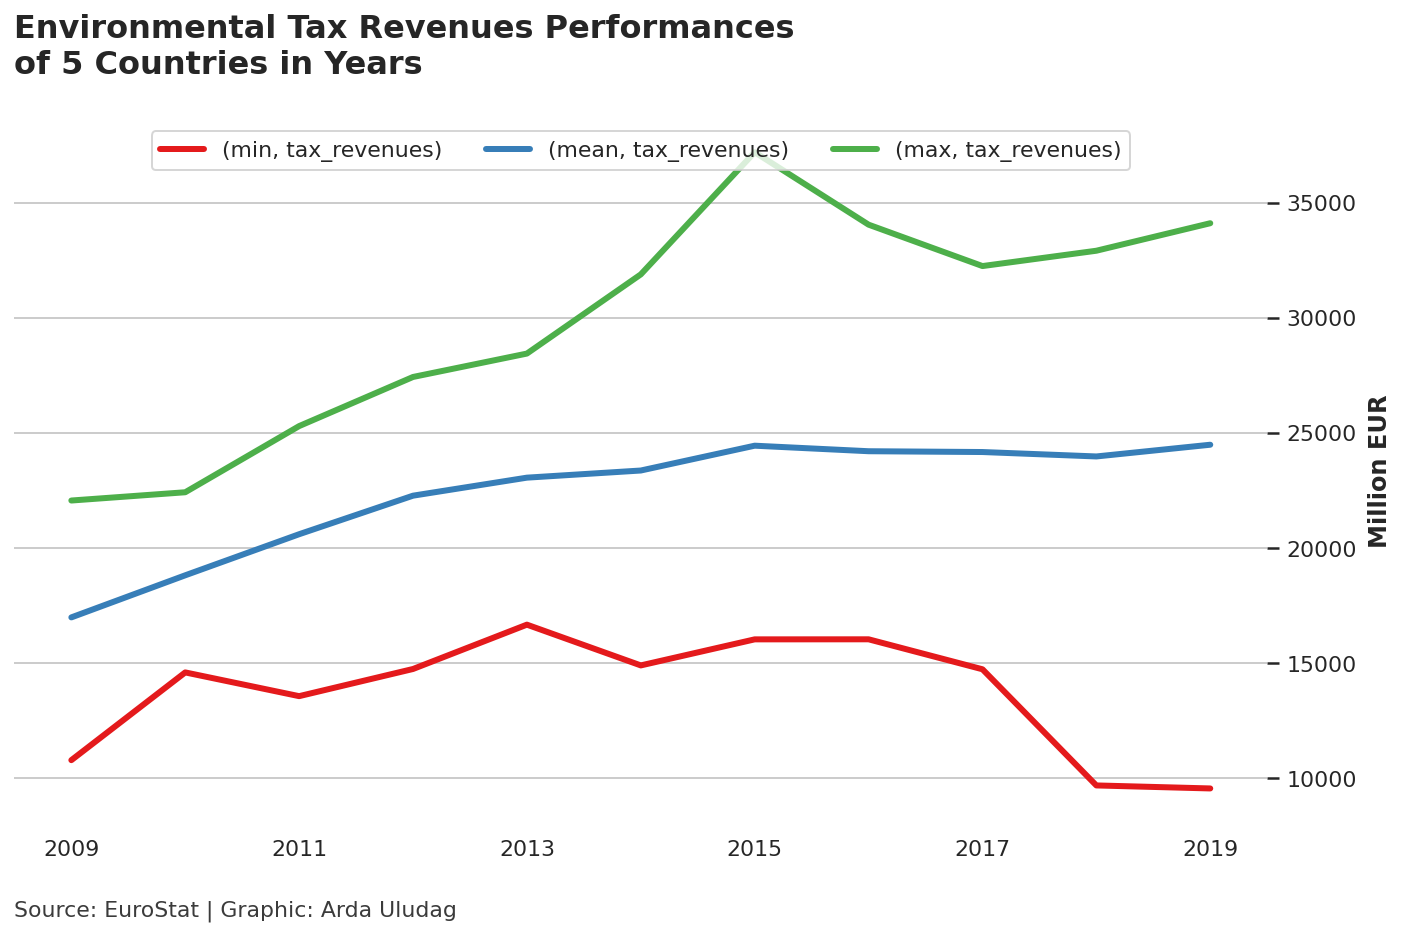

In [51]:
five_countries_to_analyze_year = pd.pivot_table(five_countries_to_analyze, index=['year'], values='tax_revenues', aggfunc=['min','mean','max']) #Building a pivot table to see data in a more detailed way
five_countries_to_analyze_year.plot.line(linewidth=3) #Plotting the data
plt.title("Environmental Tax Revenues Performances \nof 5 Countries in Years", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.legend(ncol=3, loc="upper center")
plt.text(-0.5, 4000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

Text(-0.5, 4000, 'Source: EuroStat | Graphic: Arda Uludag')

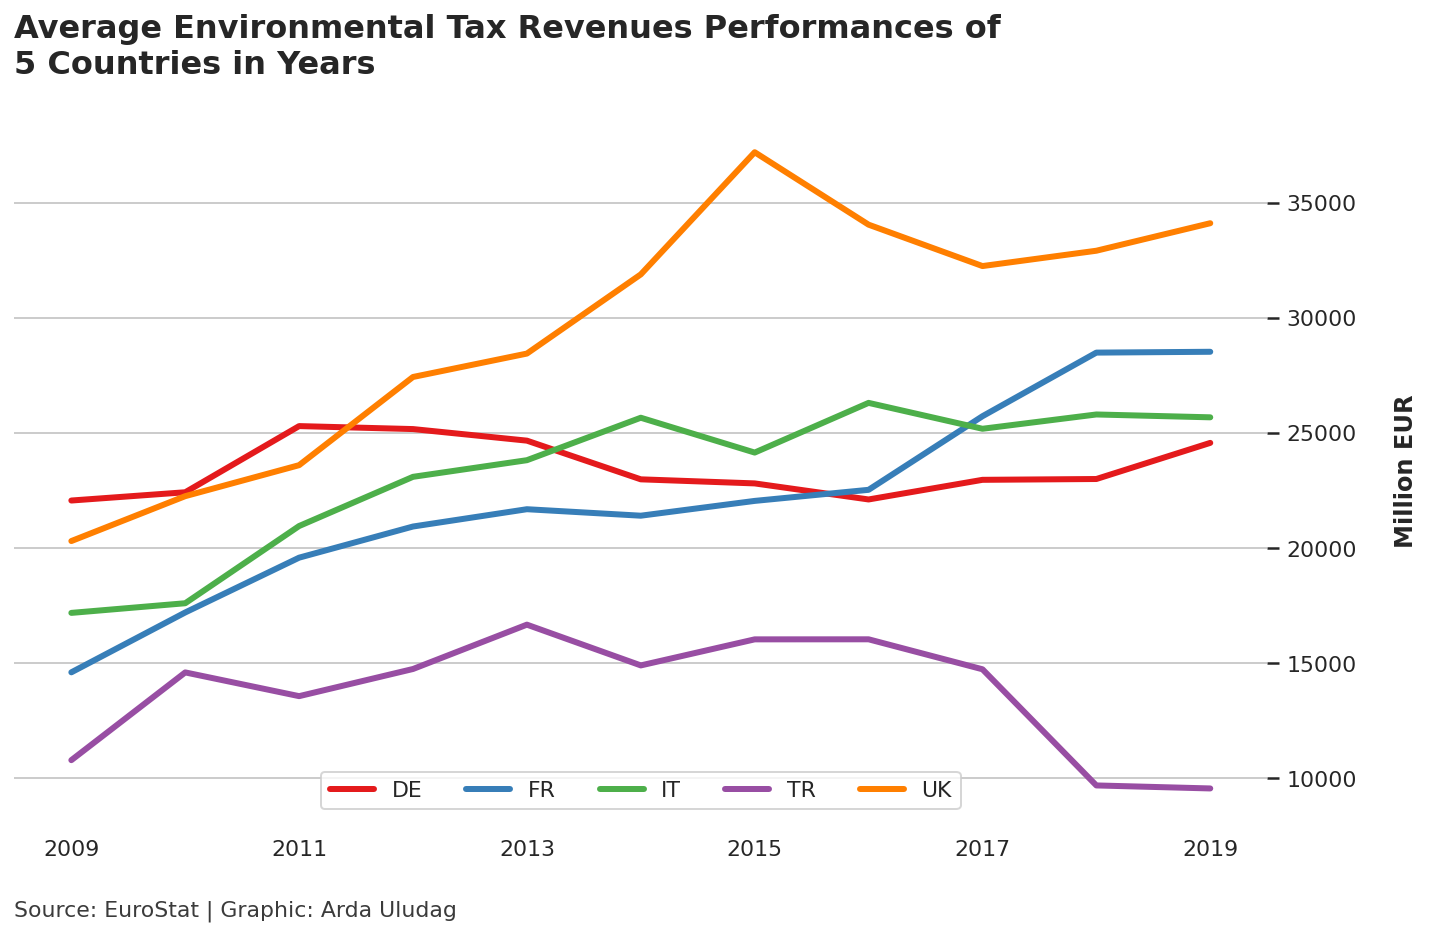

In [52]:
fig = plt.figure()
ax2 = plt.subplot()
ax2.grid(axis='x')
five_countries_to_analyze_pivot.plot.line(ax=ax2, linewidth=3) #Plotting the data
plt.title("Average Environmental Tax Revenues Performances of \n5 Countries in Years", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.12,0.5)
ax.yaxis.tick_right()
plt.box(on=None) 
plt.legend(ncol=5, loc="lower center")
plt.text(-0.5, 4000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

According to the chart, the United Kingdom has the highest revenue, but in 2019 it is below the peak revenue level of 2015. Although Italy has collected a much higher revenue than in 2009, it has a horizontal trend in the last 5 years. Germany, on the other hand, has a generally flat performance, which is below the peak revenue level in 2011, but slightly above the level in 2009. Although Turkey has reached its peak in terms of environmental tax revenues in 2013, it is the only country among 5 countries that is below its 2009 level as of the end of the period. It could be predicted that this is also a result of an exchange rate shock that happened in Turkey. Among all these 5 countries, France stands out as the only country with a relatively stable upward trend except in 2014.

The key finding from this graph is that none of the 4 out of 5 countries with the highest environmental tax revenues was able to consistently increase their revenue in the analysis period.

At this very moment, you may wonder if these 5 countries are outliers, what is the performance of Europe in environmental tax revenues except for these 5 countries. Now I will try to address this question.

In [53]:
other_countries_to_analyze = tax_revenues_broad_final[~tax_revenues_broad_final.country.isin(five_countries)] #Filtering these 5 countries in the dataframe
other_countries_to_analyze_country = pd.pivot_table(other_countries_to_analyze, index=['country'], values='tax_revenues', aggfunc=['min','mean','max']) #Building a pivot table to see data in a more detailed way
other_countries_to_analyze_country = other_countries_to_analyze_country.round(2) #Rounding numbers with 2 decimals
print(other_countries_to_analyze_country) #Printing the pivot table


                 min         mean          max
        tax_revenues tax_revenues tax_revenues
country                                       
AT           2423.09      2671.31      3110.54
BE           4045.36      5009.46      6132.60
BG            585.91       844.82      1283.40
CH           1996.18      2885.80      3609.47
CY            144.95       181.19       234.14
CZ           2619.80      2928.46      3578.34
DK           4062.96      4482.45      5033.65
EE            267.93       403.71       667.20
EL           2691.17      3426.85      3918.61
ES           6842.90      8729.83     10690.00
FI           2398.72      3152.29      3471.16
HR            563.57       768.87      1052.10
HU           1043.65      1471.99      1848.85
IE           1345.79      1748.26      2204.18
IS             49.18       113.77       172.31
LT            247.20       351.17       513.73
LU            290.49       314.04       371.23
LV            318.91       490.89       621.23
MT           

In [54]:
#Analyzing year based data
other_countries_to_analyze_year = pd.pivot_table(other_countries_to_analyze, index=['year'], values='tax_revenues', aggfunc=['min','mean','max']) #Building a pivot table to see data in a more detailed way
other_countries_to_analyze_year = other_countries_to_analyze_year.round(2)
print(other_countries_to_analyze_year) #Printing the pivot table

              min         mean          max
     tax_revenues tax_revenues tax_revenues
year                                       
2009        49.18      2181.46       8306.0
2010        65.95      2280.60       8297.0
2011        71.09      2377.20       8471.0
2012        68.77      2346.10       7730.0
2013        77.23      2455.64       9012.8
2014       100.68      2510.12       8807.0
2015       112.19      2656.41       9603.0
2016       108.82      2728.58       9714.9
2017       117.71      2798.90       9855.7
2018       129.28      2944.83      10690.0
2019       143.88      3069.25      10845.0


Text(-0.5, -2000, 'Source: EuroStat | Graphic: Arda Uludag')

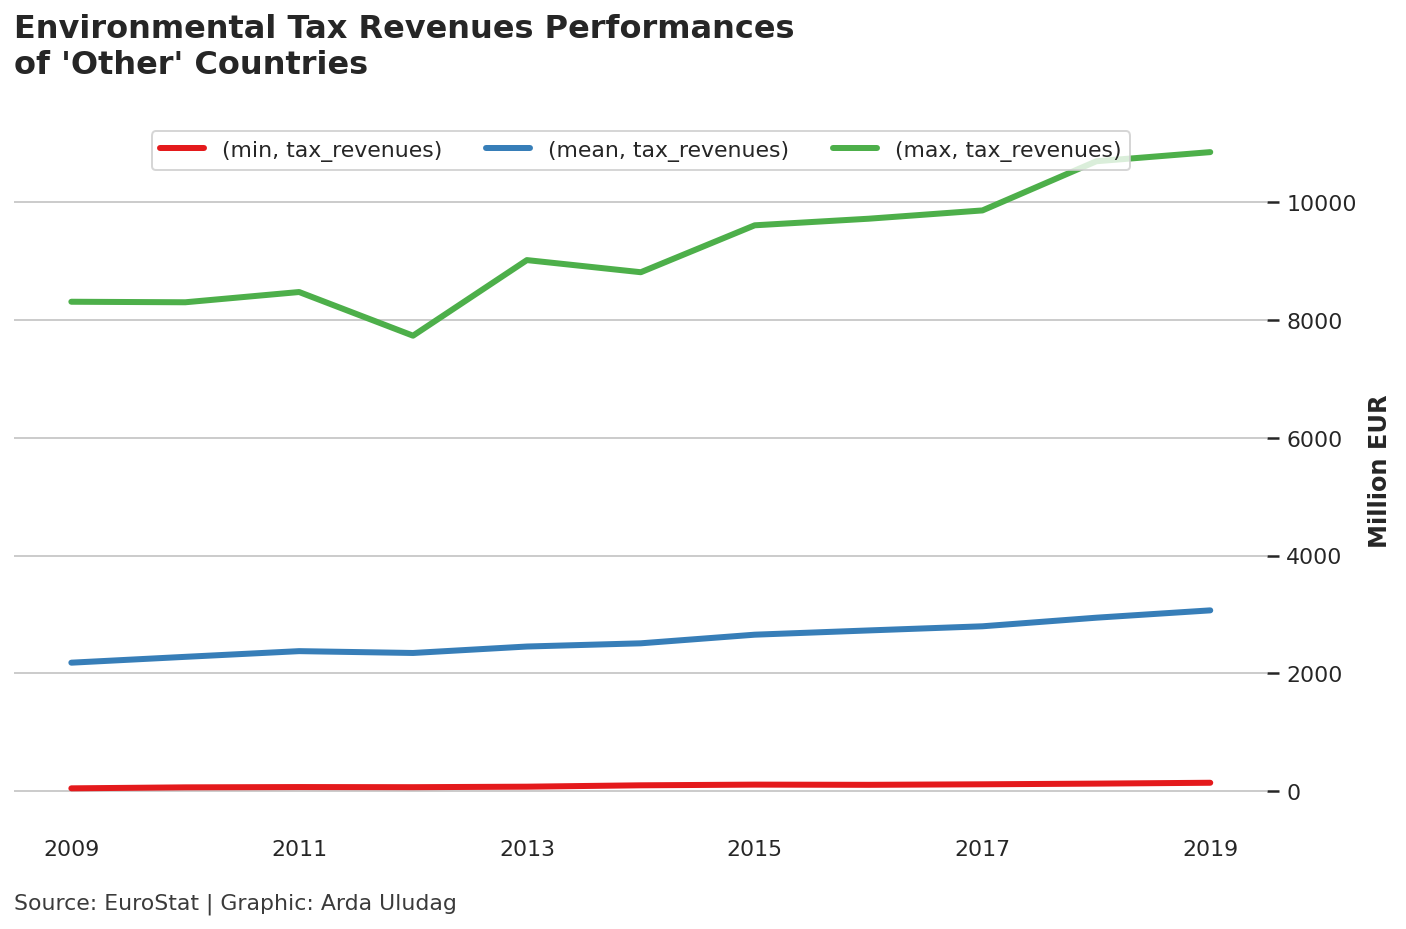

In [55]:
other_countries_to_analyze_year.plot.line(linewidth=3) #Plotting the data
plt.title("Environmental Tax Revenues Performances \nof 'Other' Countries", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.legend(ncol=3, loc="upper center")
plt.text(-0.5, -2000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

Looking at the averages, Estonia and the Netherlands share the top. their closest follower is Poland. Malta is the least revenue-generating, followed by Iceland.

In the repeated analysis, excluding the 5 countries classified as Outliers, I found that there is progress in the average environmental tax revenues in the remaining 28 countries over the 11 years, but it does not lead to a dramatical change. During this period, I concluded that there was no breakthrough, especially in countries with very little tax income. On the other hand, I found that countries with high tax revenues in this group have increased their performance somewhat over the years. However, it is worth remembering that this increase is quite limited.

Therefore, the most important finding I have obtained as a result of the first part of the analysis is that countries other than the UK, France, Germany, Italy, and Turkey have not made a remarkable improvement in their income from environmental taxes over time, therefore they need to review their policies in this area to create a source of budget. In the 5 countries that we describe as outliers, it is possible to say that I have encountered a relatively positive picture in general, which includes ups and downs, rather than talking about a stable environmental income increase over 11 years.

In the next step of the analysis, I'll analyze different types of taxes regarding their tax revenue generation abilities.

## Part IV - Tax Based Analysis 

First of all, let's remember the dataframe we will use in this analysis.

In [56]:
print(revenues_tax_based_final_pivot) #Remembering the relevant pivot table

             tax_revenues                          
tax                   NRG      POL     RES      TRA
country year                                       
AT      2009      2546.44    57.30    0.00   506.81
        2010      1818.58    50.88    0.00   593.91
        2011      1878.72    52.81    0.00   619.07
        2012      1843.34    53.10    0.00   641.25
        2013      1805.01    53.20    0.00   636.70
...                   ...      ...     ...      ...
UK      2015     28799.80  1416.30  487.71  6480.35
        2016     26458.24  1249.57  494.22  5835.41
        2017     25480.10  1031.17  427.76  5300.05
        2018     26420.76   951.72  413.69  5119.08
        2019     27475.14   893.17  451.14  5280.43

[374 rows x 4 columns]


Text(-0.5, -1000, 'Source: EuroStat | Graphic: Arda Uludag')

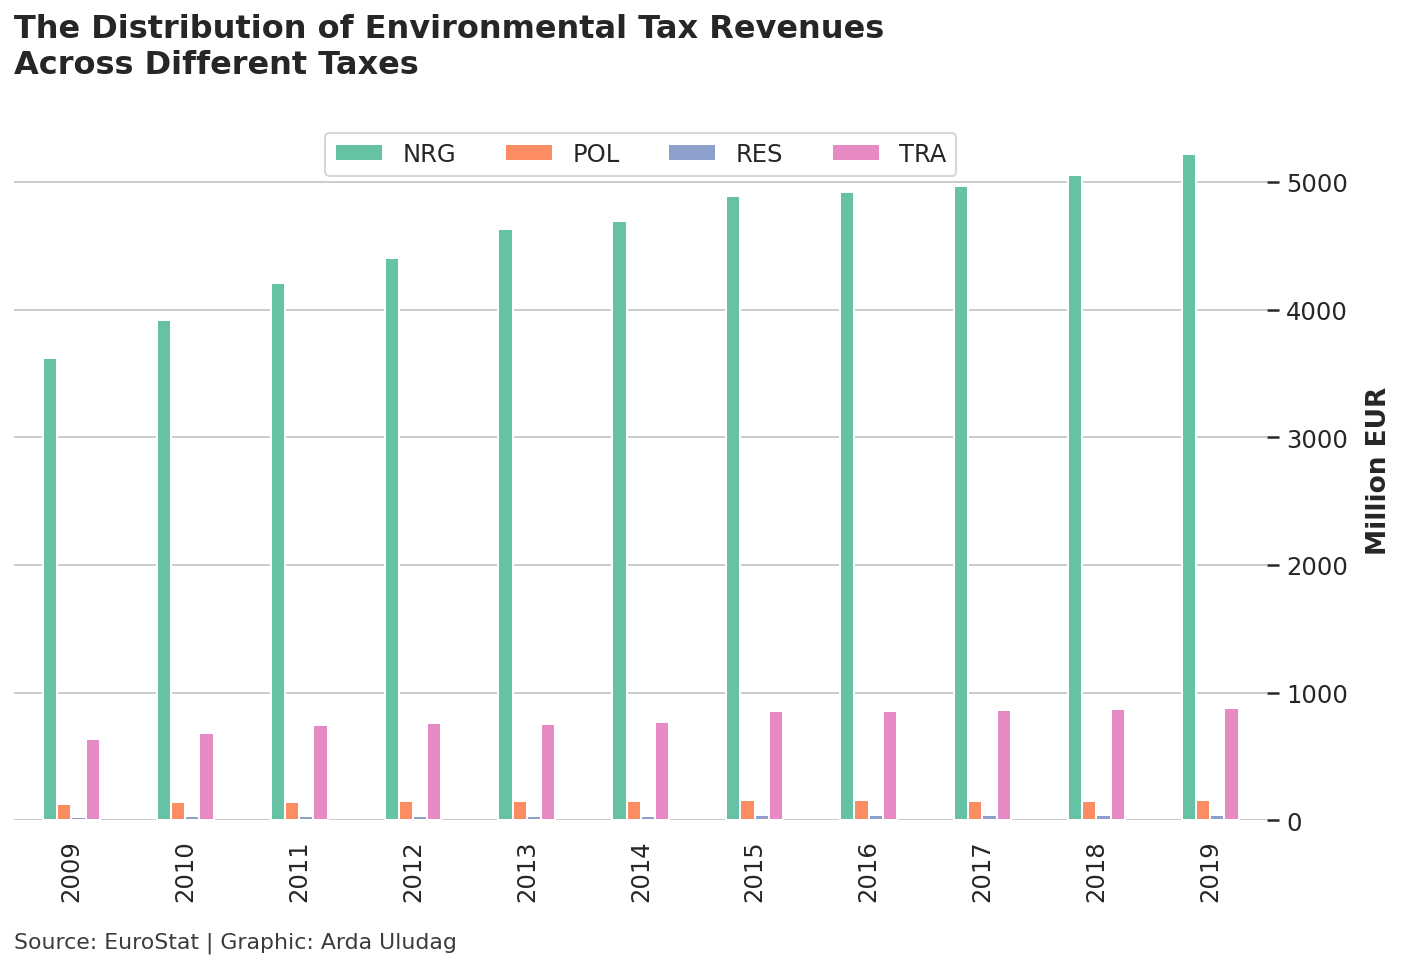

In [57]:
sns.set(style='whitegrid', #Setting up the seaborn chart specifications
        palette="Set2", 
        font_scale=1.1)
pd.pivot_table(revenues_tax_based_final_pivot, index=['year'], values ='tax_revenues').plot(kind='bar') #Visualising annual means accross countries of each taxes to show their revenue generation ability
plt.title("The Distribution of Environmental Tax Revenues \nAcross Different Taxes", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='Tax')#Naming legend
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.legend(ncol=4, loc="upper center")
plt.text(-0.5, -1000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

According to the graph, even though the tax revenues coming from pollution and resources have remained at the same levels, there is a significant increase in energy-sourced tax revenues. During this period, transportation-related tax revenues also slightly increased.

Now, it is easy to say that the policy recommendation raised by various international organizations for more tax collection from the transportation sector could not find ground at the desired level in the analysis period. Moreover, it is necessary to emphasize that, according to the 6th Assessment Report of the IPCC, the sector with the highest emission increased the transportation sector by 1.8% compared to the 2010 levels.

Text(-0.5, -5000, 'Source: EuroStat | Graphic: Arda Uludag')

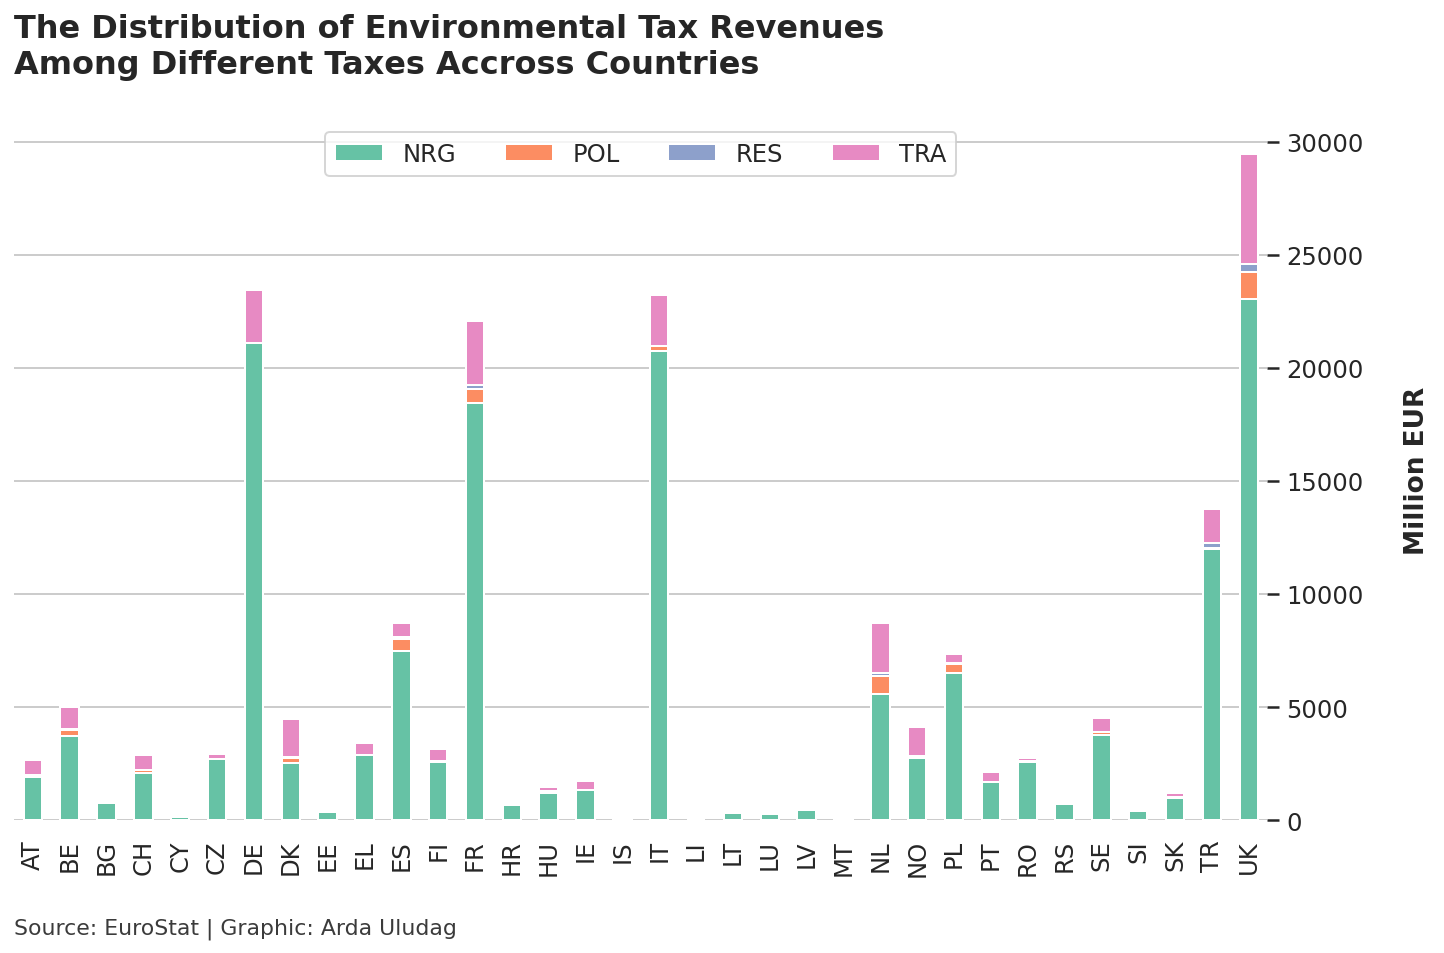

In [58]:
sns.set(style='whitegrid', #Setting up the seaborn chart specifications
        palette="Set2", 
        font_scale=1.1) 
pd.pivot_table(revenues_tax_based_final, index=["country"], columns='tax', values = 'tax_revenues').plot(kind='bar',stacked=True) #Building the pivot table and the stacked bar chart
plt.title("The Distribution of Environmental Tax Revenues \nAmong Different Taxes Accross Countries", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='Tax')#Naming legend
plt.box(on=None)
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.13,0.5)
ax.yaxis.tick_right()
plt.legend(ncol=4, loc="upper center")
plt.text(-0.5, -5000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

When we look at the compositions of 11-year environmental tax revenues, we encounter the same profile in almost all countries. In all countries, the biggest source of income taxes on energy. These taxes, on the other hand, are followed by tax revenues collected from transportation in most countries.

The country with the highest revenue in the transportation domain was also the UK. It is seen that it has gained revenue of approximately 5 billion EUR in this field, and there is a serious difference between its closest follower in this field. In this graph, I can say that the main reason for the difference in tax revenues between countries is therefore based on the differences in energy taxes.

At this point, I will take the analysis one step further and examine the data according to the NACE classes.

## Part V - Tax Revenues With Respect To NACE Classification

Let's remember our table that includes the NACE codes, which is much more comprehensive than the one I used in the previous chapters.

In [59]:
print(revenues_nace_based_final_pivot) #Remembering the relevant pivot table

                          tax_revenues
country tax nace_r2 year              
AT      ENV A       2009        254.87
                    2010        114.33
                    2011        130.61
                    2012        130.71
                    2013        129.09
...                                ...
UK      TRA U       2015          0.00
                    2016          0.00
                    2017          0.00
                    2018          0.00
                    2019          0.00

[25630 rows x 1 columns]


Since the data in our table presents both separately according to tax types and total data with ENV value, we will divide the analysis into two. First, we will work with the sum of all taxes. So we will filter the dataframe first.

In [60]:
revenues_nace_based_final_1 = revenues_nace_based_final[revenues_nace_based_final['tax'] == 'ENV'] #Setting up the filter
revenues_nace_based_final_1 = revenues_nace_based_final_1.drop('tax', axis = 1) #Filtering total environmental tax revenues
print(revenues_nace_based_final_1) #Printing the final dataframe

      country nace_r2  year  tax_revenues
0          AT       A  2009        254.87
1          BE       A  2009         36.82
2          BG       A  2009         51.68
3          CH       A  2009        139.19
4          CY       A  2009          2.40
...       ...     ...   ...           ...
23755      SE       U  2019          0.08
23756      SI       U  2019          0.00
23757      SK       U  2019          0.00
23758      TR       U  2019          0.00
23759      UK       U  2019          0.00

[5060 rows x 4 columns]


Text(-0.5, -60000, 'Source: EuroStat | Graphic: Arda Uludag')

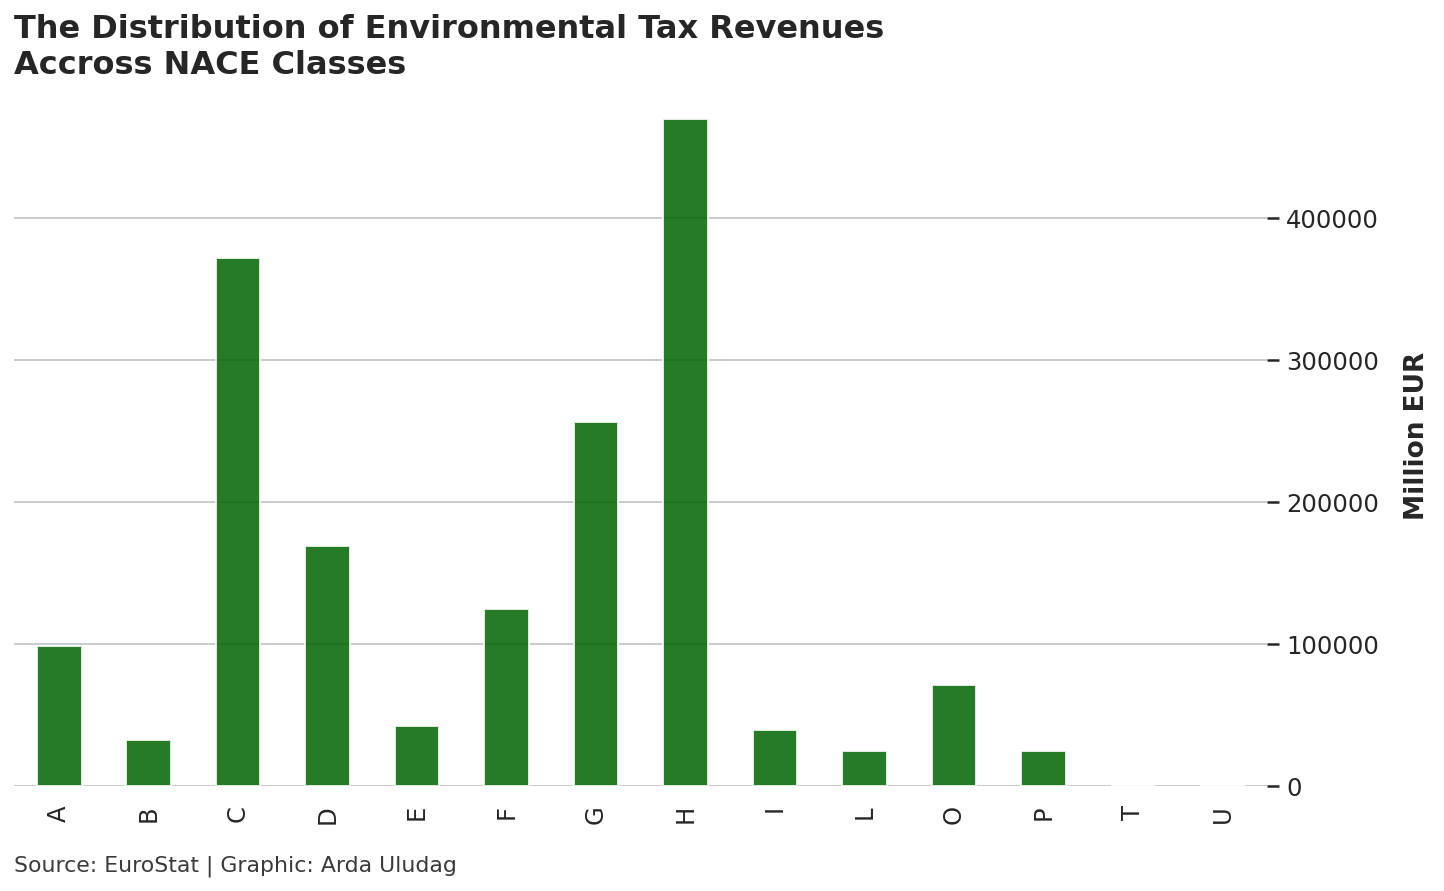

In [61]:
pd.pivot_table(revenues_nace_based_final_1, index=['nace_r2'], values='tax_revenues', aggfunc=np.sum).plot(kind='bar', legend=False, color= 'darkgreen', alpha=0.85) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nAccross NACE Classes", 
          fontsize=16, 
          weight='bold', loc='left') #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.13,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, -60000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)


Lets remember NACE
decoding NACE Rev.2 Sections and their descriptions

* A: Agriculture, forestry and fishing
* B: Mining and quarrying 
* C: Manufacturing
* D: Electricity, gas, steam and air conditioning supply  
* E: Water supply, sewerage, waste management and remediation activities
* F: Construction
* G: Wholesale and retail trade; repair of motor vehicles and motorcycles 
* H: Transporting and storage
* I: Accommodation and food service activities
* L: Real estate activities
* O: Public administration and defence; compulsory social security
* P: Education
* T: Activities of households as employers; undifferentiated goods, and services producing activities of households for own use 
* U: Activities of extraterritorial organisations and bodies

Between 2009 and 2019, the highest environmental tax revenue was generated from transporting and storage. It was followed by manufacturing, wholesale and trade, and electricity, gas, steam, and air conditioning supply.

Text(-0.5, -2, 'Source: EuroStat | Graphic: Arda Uludag')

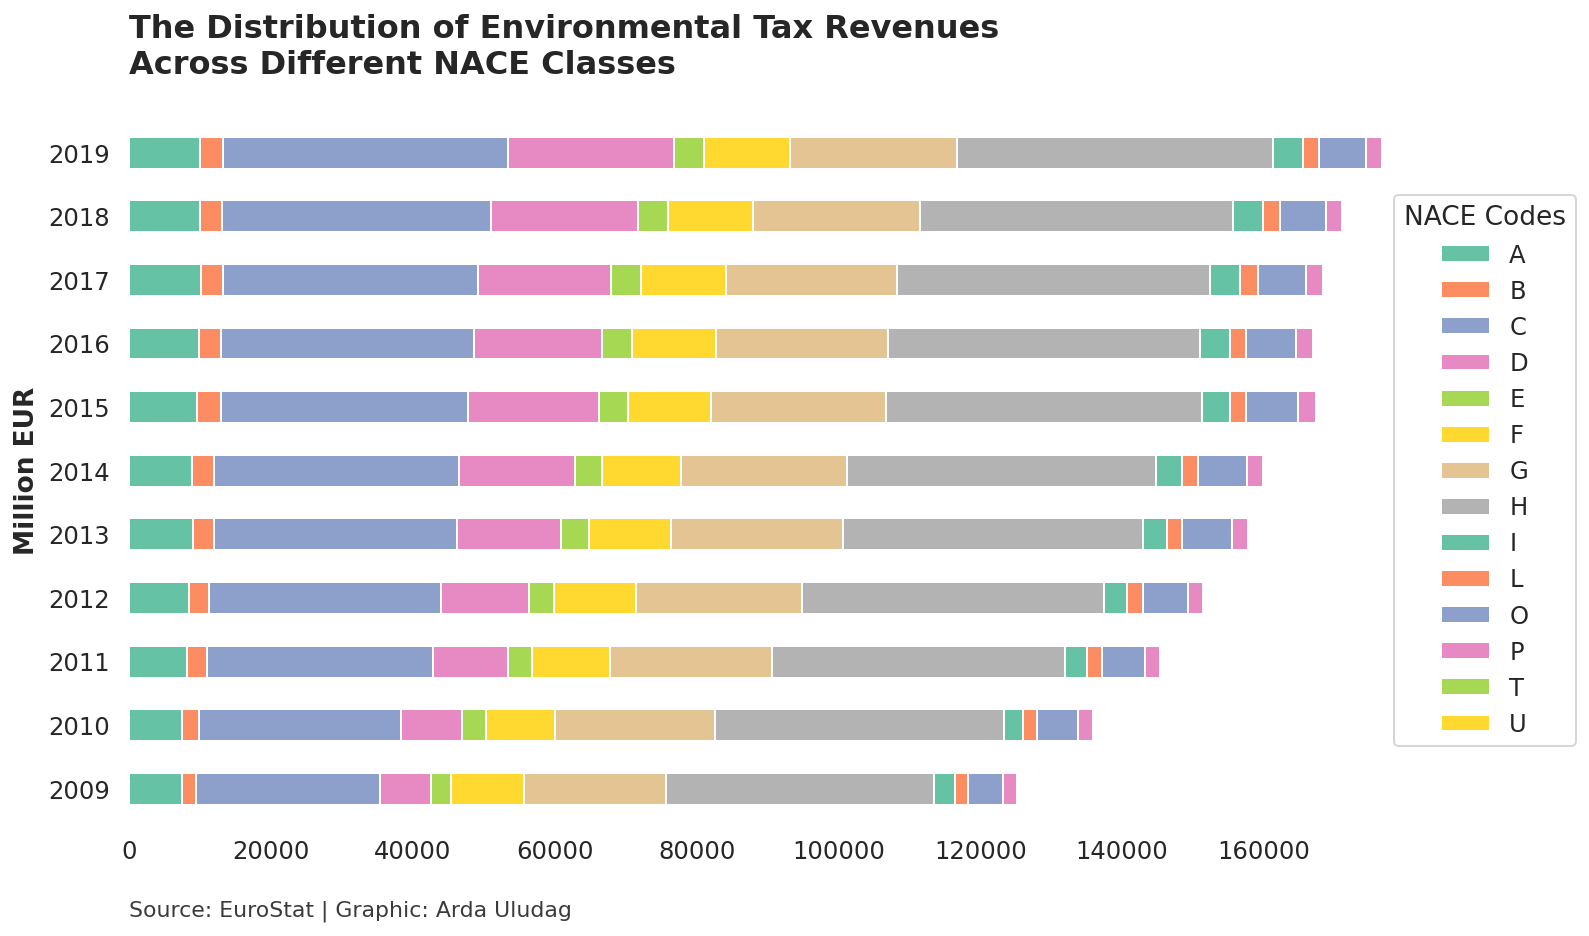

In [62]:
sns.set(style='whitegrid', #Setting up the seaborn chart specifications
        palette="Set2", 
        font_scale=1.1)
pd.pivot_table(revenues_nace_based_final_1, index=['year'], columns='nace_r2', values = 'tax_revenues', aggfunc=np.sum).plot(kind='barh', stacked=True)
plt.title("The Distribution of Environmental Tax Revenues \nAcross Different NACE Classes", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='NACE Codes', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(None)
plt.box(on=None)
plt.text(-0.5, -2, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

The chart above basically shows that there are no dramatic changes in the distribution of NACE codes over the years, [and that the increase might be a result coming from mostly the developments in the C and D fields. Therefore, as I stated in the result we obtained in the previous table,] the developments in the fields of H, C, G, and D, which have the highest shares, have been decisive in tax revenues over the years. In this respect, I will look at the changes in these 4 groups over the years.

In [63]:
four_nace_codes = ['H','C', 'G', 'D'] #Setting a criteria for 4 NACE codes
four_nace_codes_to_analyze = revenues_nace_based_final_1[revenues_nace_based_final_1.nace_r2.isin(four_nace_codes)] #Filtering these 5 countries in the dataframe
four_nace_codes_to_analyze_pivot = pd.pivot_table(four_nace_codes_to_analyze, index=['year'], columns='nace_r2', values = 'tax_revenues', aggfunc=np.sum) #Building a pivot table to see data in a more detailed way
print(four_nace_codes_to_analyze_pivot) #Printing the pivot table

nace_r2         C         D         G         H
year                                           
2009     25900.15   7125.31  20116.64  37752.17
2010     28407.92   8646.40  22567.83  40732.81
2011     31896.05  10585.68  22731.71  41449.89
2012     32658.06  12439.24  23357.27  42603.61
2013     34157.86  14679.95  24163.01  42398.67
2014     34494.41  16300.08  23483.83  43545.59
2015     34811.31  18498.03  24740.68  44612.39
2016     35665.75  18007.19  24253.23  43981.93
2017     35970.86  18658.09  24079.99  44179.09
2018     37864.41  20747.42  23567.54  44063.11
2019     40147.36  23348.02  23568.72  44470.23


Text(-0.5, 0, 'Source: EuroStat | Graphic: Arda Uludag')

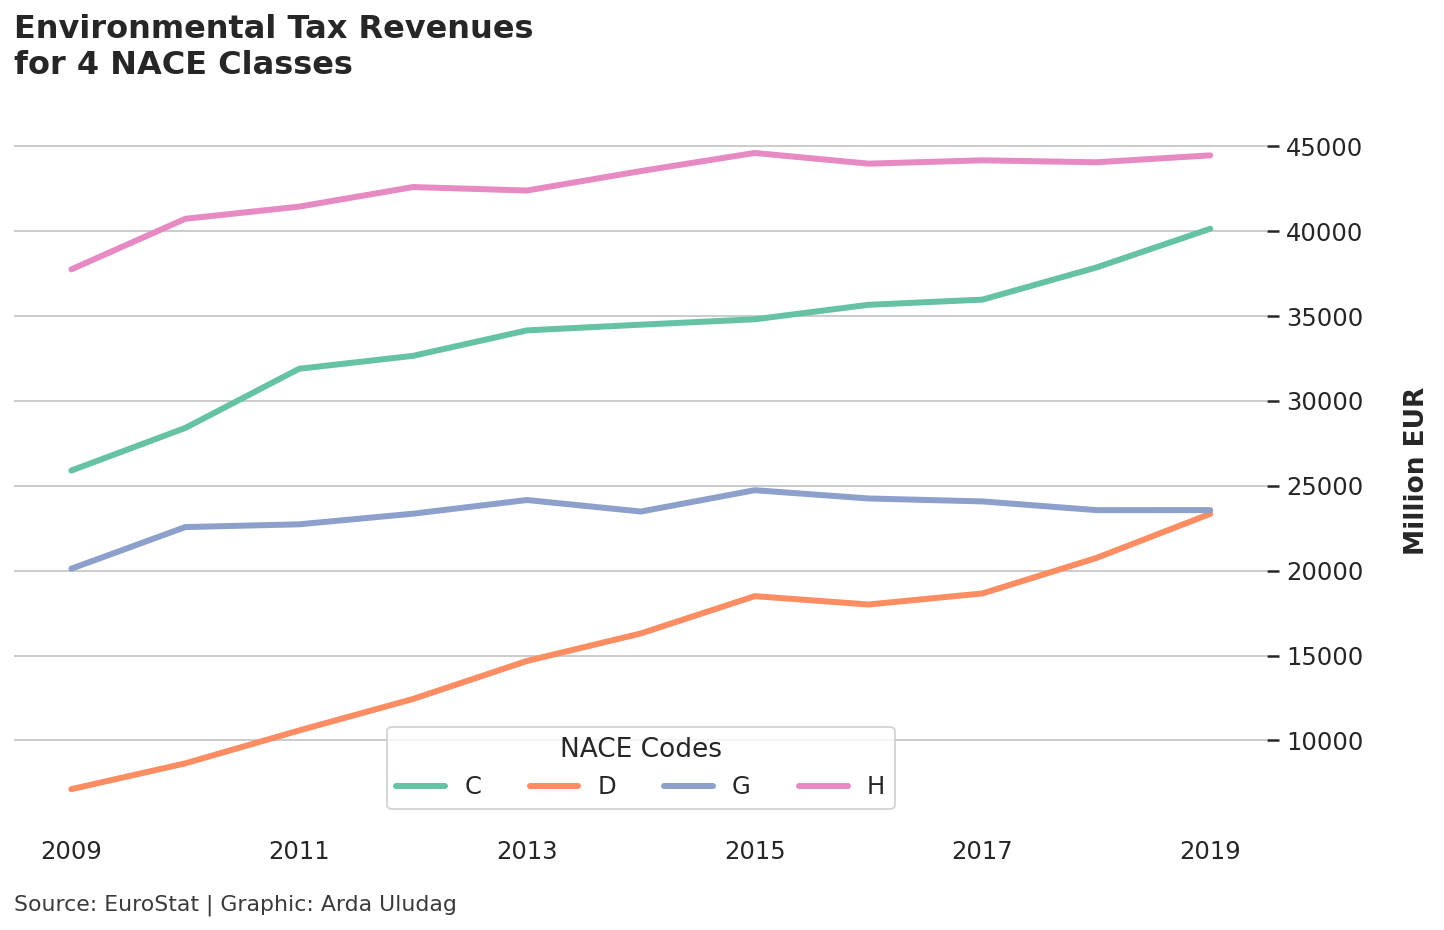

In [64]:
four_nace_codes_to_analyze_pivot.plot.line(linewidth=3) #Plotting the data
plt.title("Environmental Tax Revenues \nfor 4 NACE Classes", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.legend(title = "NACE Codes")
plt.xlabel("")#Naming x-label
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.13,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.legend(title='NACE Codes',ncol=4, loc="lower center")
plt.text(-0.5, 0, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

According to the graph, it can be seen that progress has been made in all areas over the years, this increase was quite limited in the H and G domains, but significant progress was made primarily in the D domain and then in the C domain.

As a result, I can say that there has been an improvement in the taxes collected over the electricity, gas, steam, and air conditioning supply (D) and the manufacturing (C) sectors in 11 years.

I would also like to take a look at the developments in the 5 countries with the highest tax revenues, which we have just discussed, in the 4 NACE areas with the highest income-generating capability. The findings that we will obtain as a result of this analysis will help us to reveal which NACE code generates more income in which country and will be a guide for other countries.

Text(-0.5, -3000, 'Source: EuroStat | Graphic: Arda Uludag')

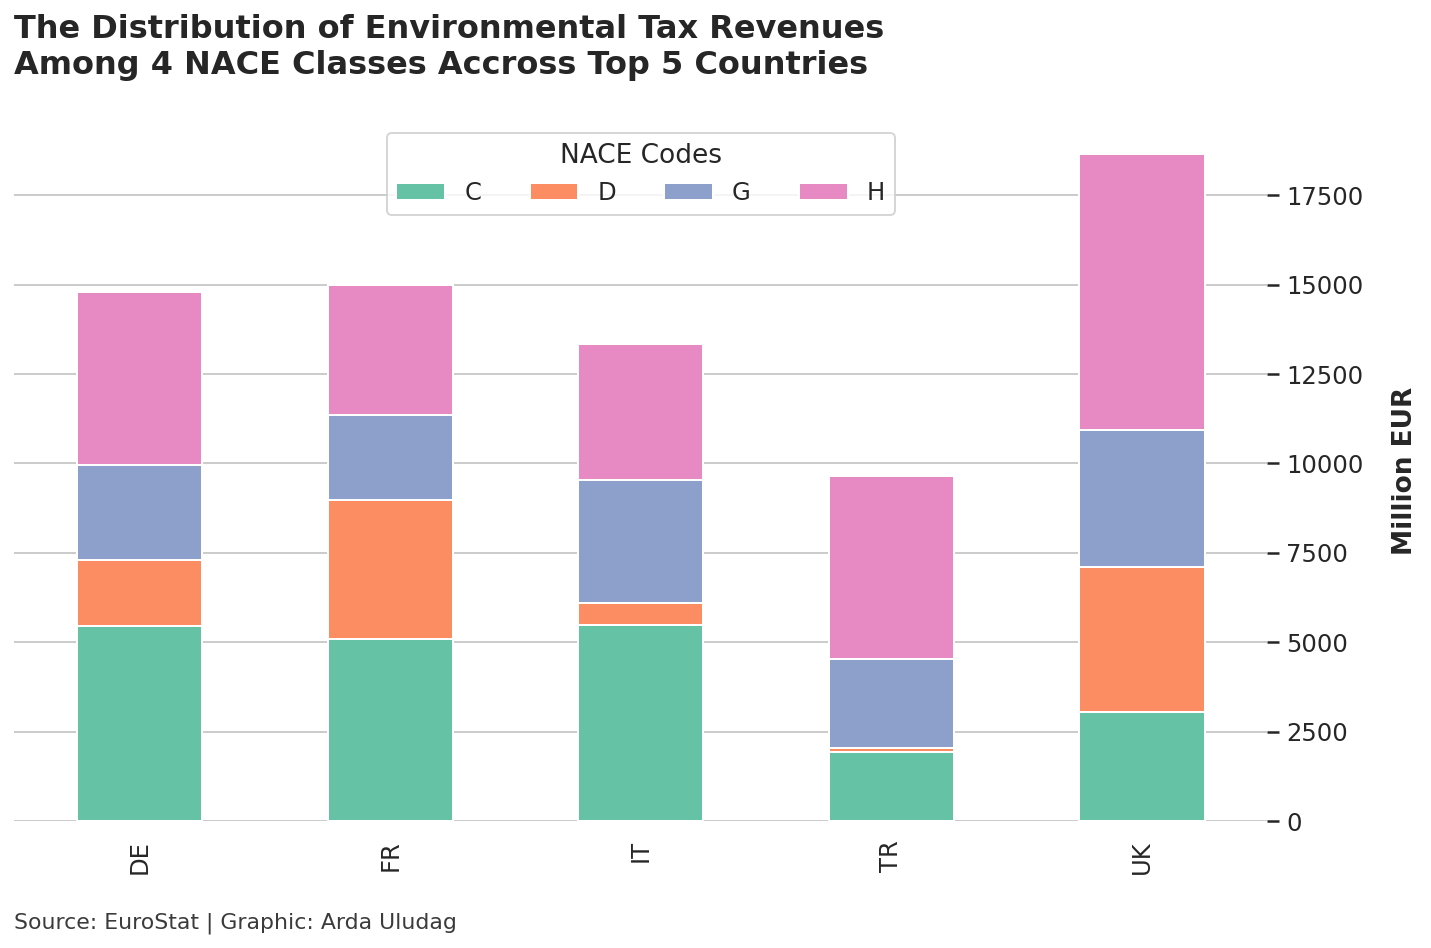

In [65]:
sns.set(style='whitegrid', #Setting up the seaborn chart specifications
        palette="Set2", 
        font_scale=1.1)
five_countries_to_analyze_2 = revenues_nace_based_final_1[revenues_nace_based_final_1.country.isin(five_countries)]
five_countries_to_analyze_2 = five_countries_to_analyze_2[five_countries_to_analyze_2.nace_r2.isin(four_nace_codes)]
pd.pivot_table(five_countries_to_analyze_2, index=['country'], columns='nace_r2', values = 'tax_revenues').plot(kind='bar', stacked=True)
plt.title("The Distribution of Environmental Tax Revenues \nAmong 4 NACE Classes Accross Top 5 Countries", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='NACE Codes',ncol=4, loc="upper center")
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.12,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, -3000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

This chart shows us the average tax revenues over 11 years and depicts differences in the tax revenue distribution in the 4 NACE areas in the top 5 countries. While the H domain has the highest share in the United Kingdom and Turkey, C is dominant in the rest. While no striking difference is observed between countries in the G field, it is useful to draw attention to the D field. Because, while the UK and France have similar revenues in this domain, which has an important place in the differences between countries, these rates are very small in Germany, Italy, and Turkey.

Lastly, I find it stimulating to look at the change in the differences between NACE classes over the years in particular countries.

Text(-0.5, 0, 'Source: EuroStat | Graphic: Arda Uludag')

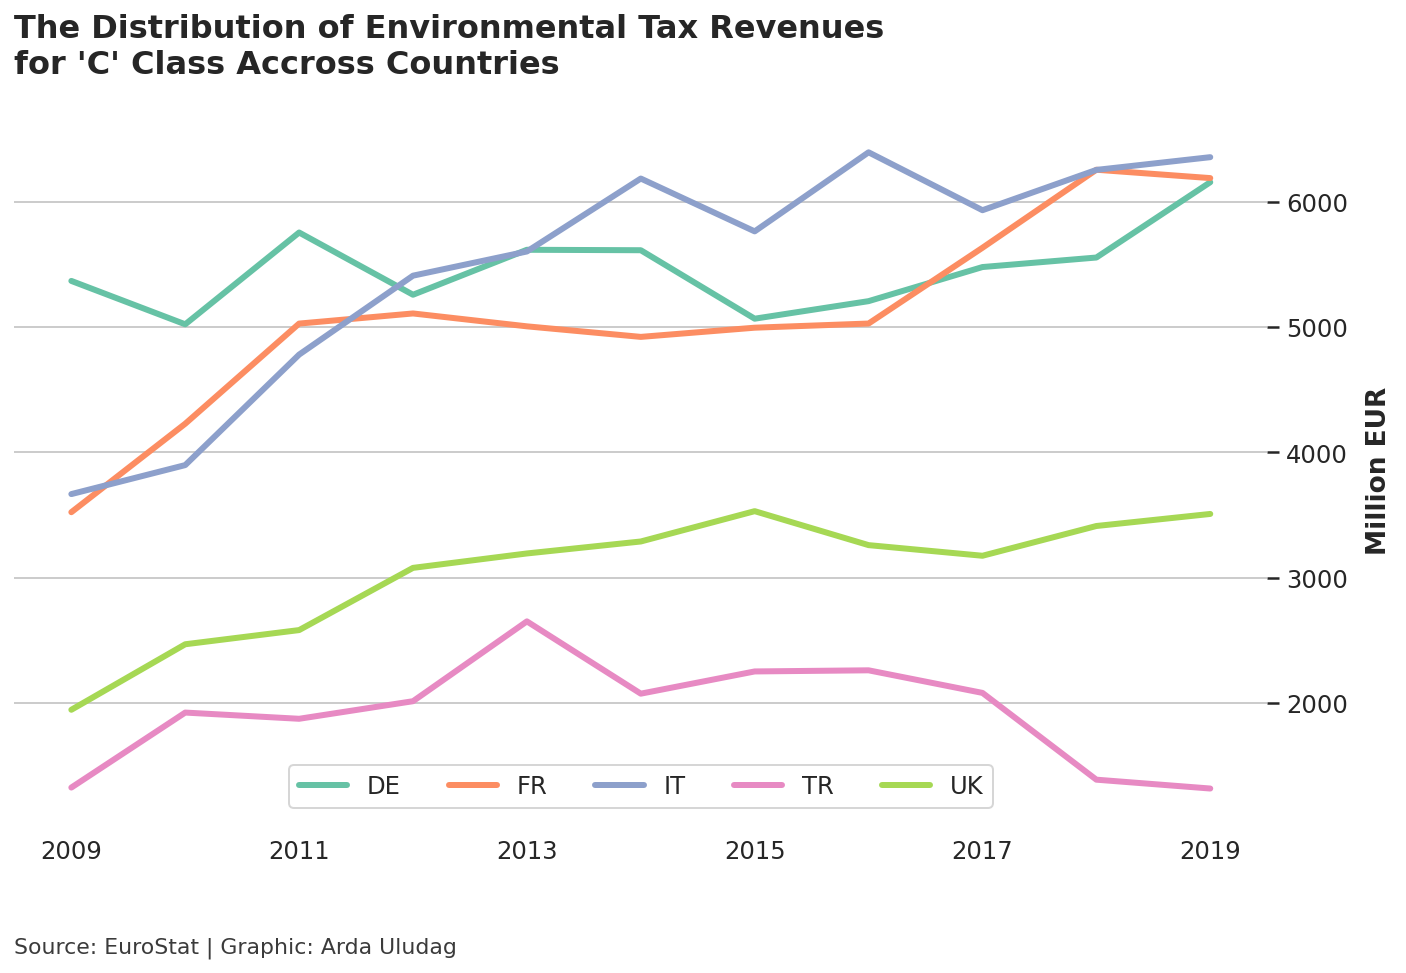

In [66]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.nace_r2 == 'C'], 
               index=['year'], 
               columns='country', 
               values='tax_revenues').plot(kind='line',linewidth=3) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nfor 'C' Class Accross Countries ", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(ncol=5, loc="lower center")#Naming the legend
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, 0, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

In terms of manufacturing, all countries have increased their revenues within the analysis period except Turkey. In this domain, the highest revenues were generated in Italy, France, and Germany. Surprisingly, the UK, the leading country for previous statistics, performs relatively weakly in this domain. According to this chart, Turkey is the only country that ends up in a worse place than where it started.

Text(-0.5, -1200, 'Source: EuroStat | Graphic: Arda Uludag')

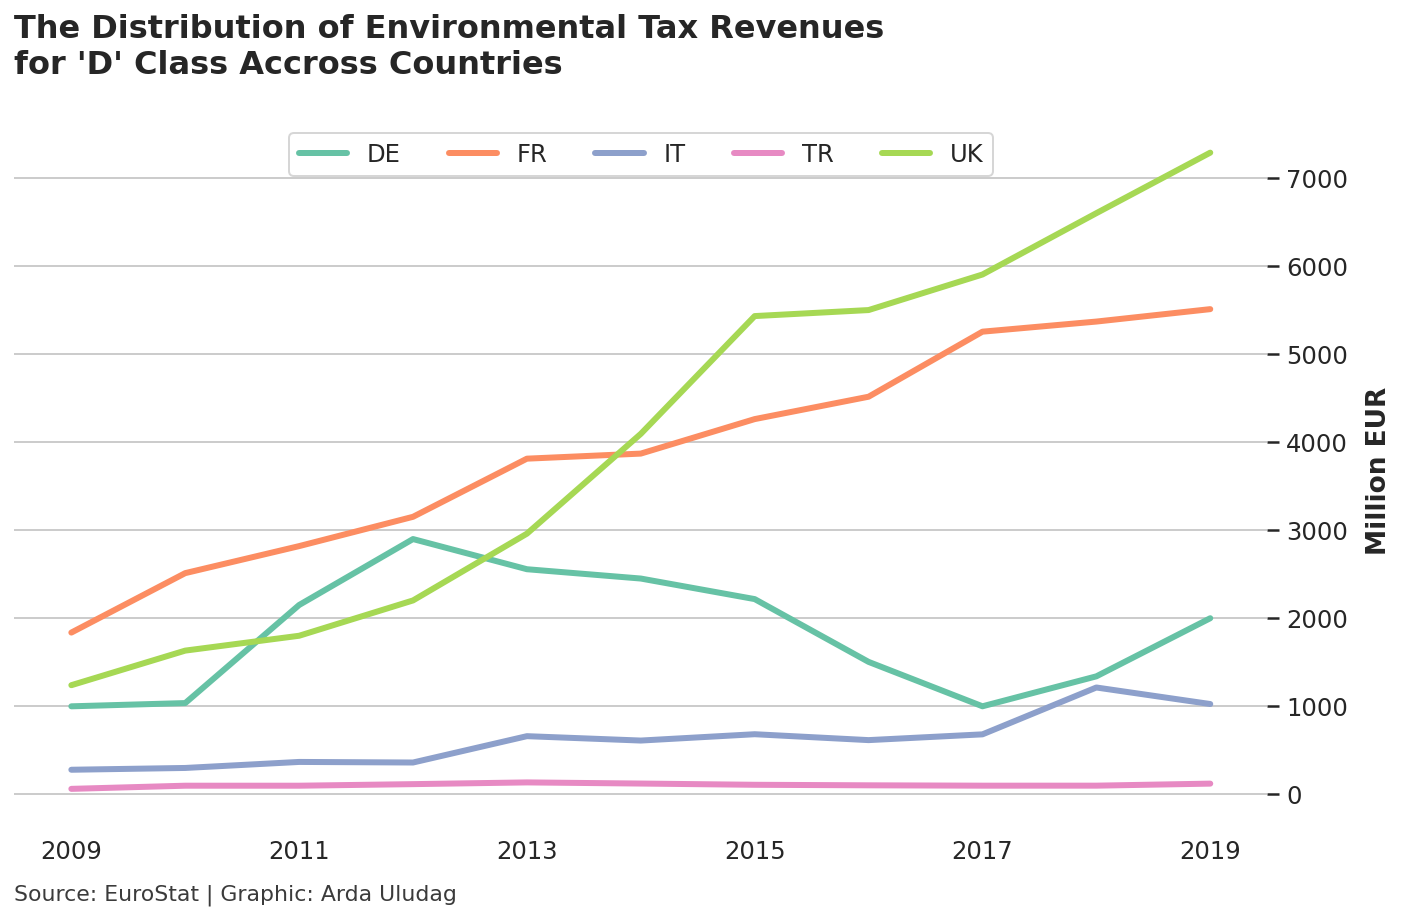

In [67]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.nace_r2 == 'D'], 
               index=['year'], 
               columns='country', 
               values='tax_revenues').plot(kind='line', linewidth=3 ) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nfor 'D' Class Accross Countries ", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(ncol=5, loc="upper center")#Positioning the legend
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, -1200, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

The UK showed a very aggressive performance in environmental tax revenues collected within the scope of electricity, gas, steam, and air conditioning supply and became the country with the fastest increase compared to 2009 and the country with the highest revenue in this field as of 2019. While France followed the UK with a steady increase in its revenues, Germany, which followed them, drew a fluctuating picture. Italy and Turkey could not generate much income in this area.

Text(-0.5, 1000, 'Source: EuroStat | Graphic: Arda Uludag')

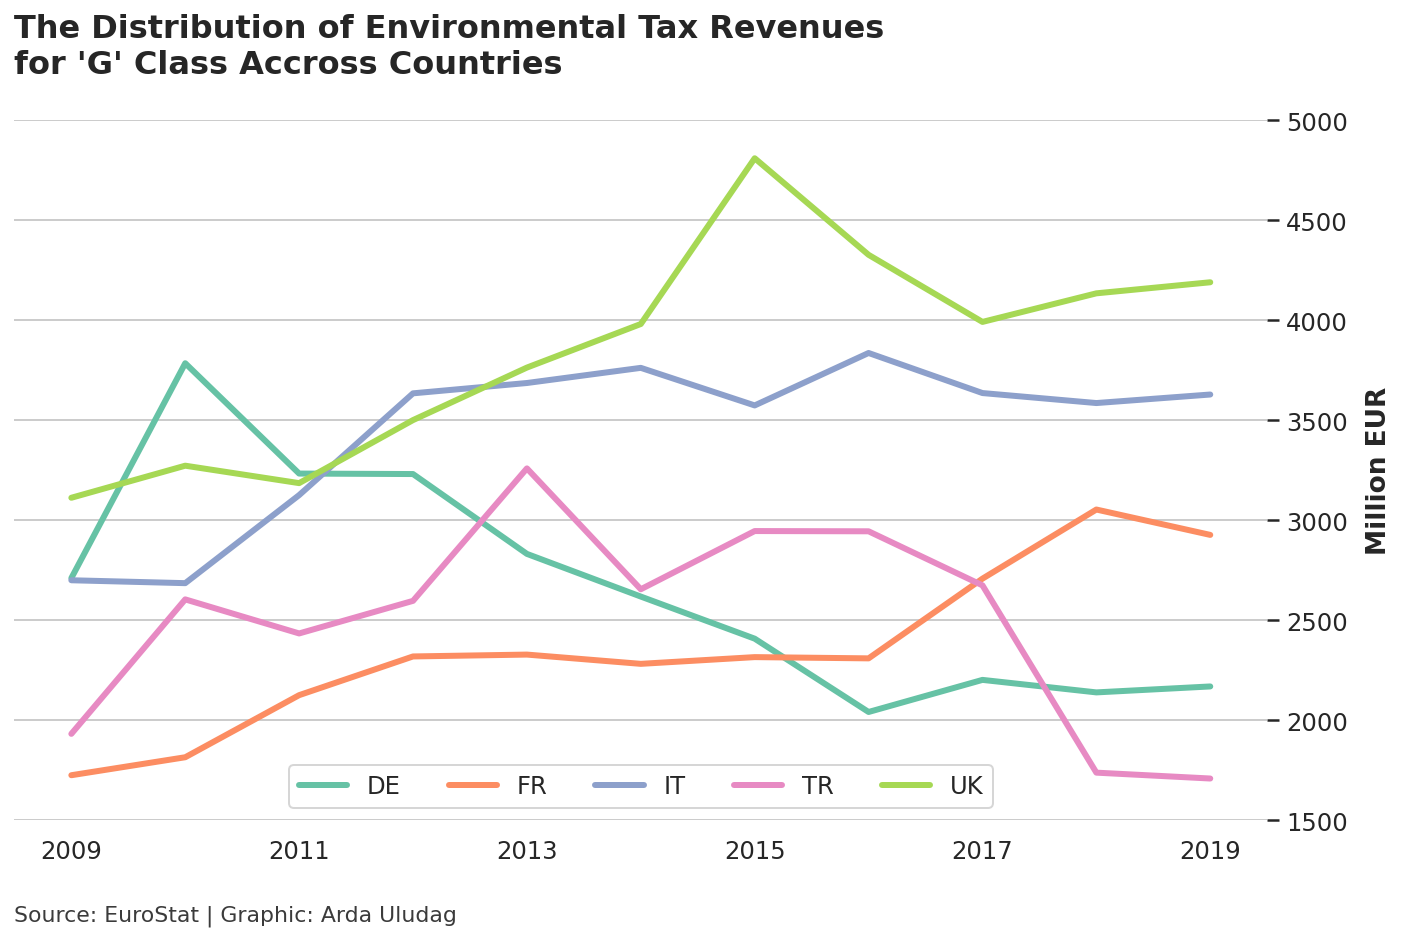

In [68]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.nace_r2 == 'G'], 
               index=['year'], 
               columns='country', 
               values='tax_revenues').plot(kind='line', linewidth=3) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nfor 'G' Class Accross Countries ", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(ncol=5, loc="lower center")#Positioning the legend
ax = plt.gca()
ax.xaxis.grid()
ax.set_ylim(1500,5000)
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, 1000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

In the wholesale and retail trade area, the picture looks very complex. The UK is the country with the highest income in this field, followed by Italy. In this period, Germany and Turkey seem to have experienced a loss of revenue in 2019 compared to 2009.

Text(-0.5, 1000, 'Source: EuroStat | Graphic: Arda Uludag')

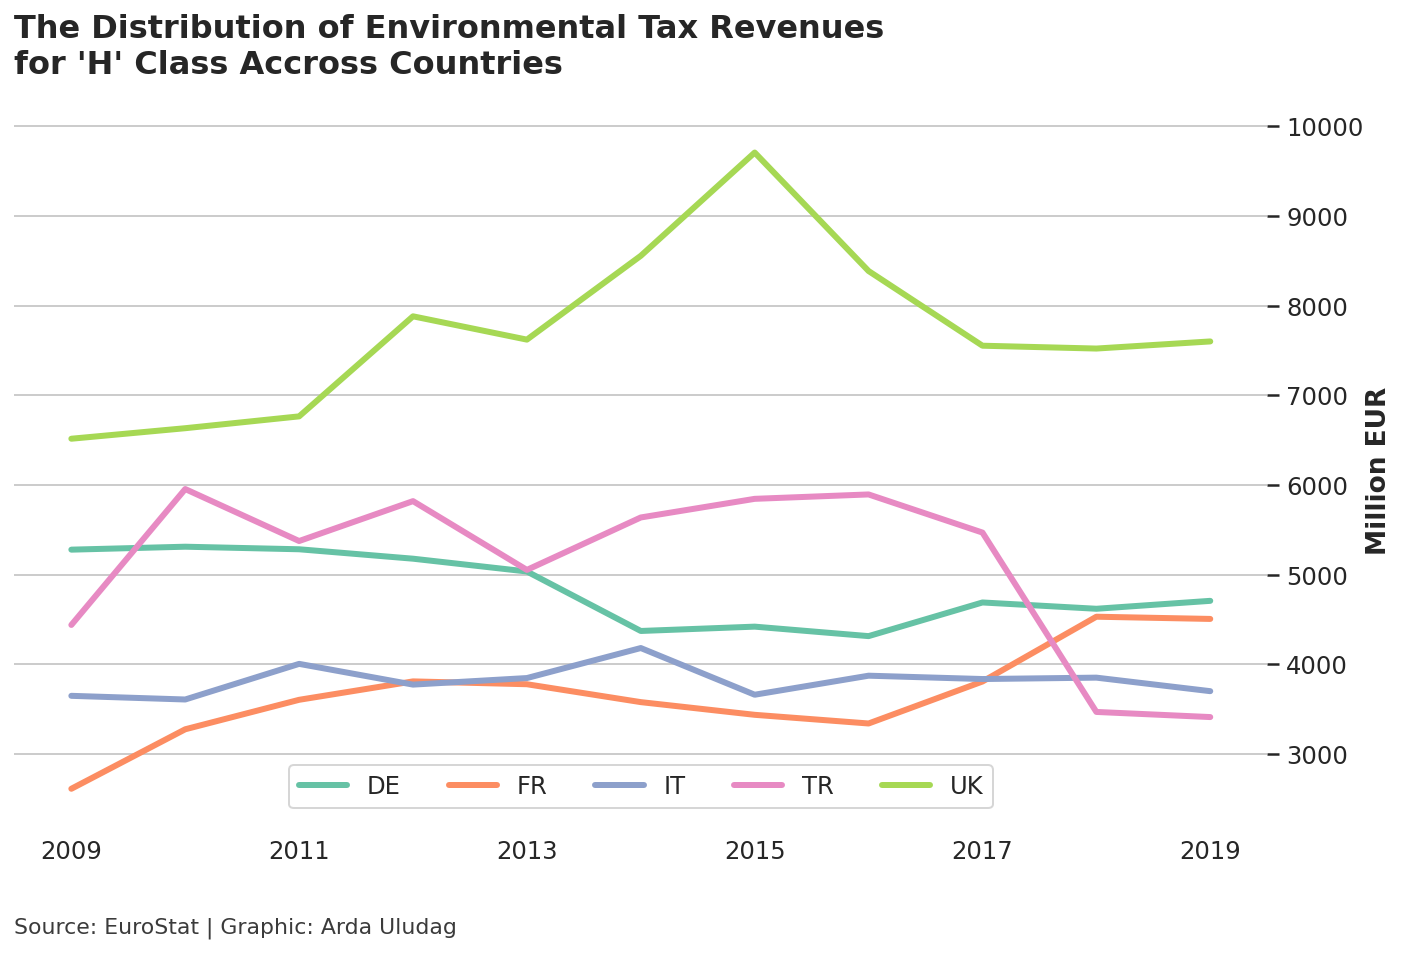

In [69]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.nace_r2 == 'H'], 
               index=['year'], 
               columns='country', 
               values='tax_revenues').plot(kind='line', linewidth=3) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nfor 'H' Class Accross Countries ", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(ncol=5, loc="lower center")#Positioning the legend
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, 1000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

In the field of transport and storage, the UK has made a significant difference to its closest follower by putting its weight. Although it remained below the revenue of approximately 10 billion euros in 2015, in 2019, the UK created approximately 7 billion euros in revenue, while other countries generated environmental tax revenues in the range of 3.5–4.5 billion euros.

After my analysis based on domains, I will also deal with the issue concerning countries.

## Part VI - Country based NACE Analysis

Now is the time for analyzing these 5 countries by looking at the NACE classification composition in each of them.

Text(-0.5, -1, 'Source: EuroStat | Graphic: Arda Uludag')

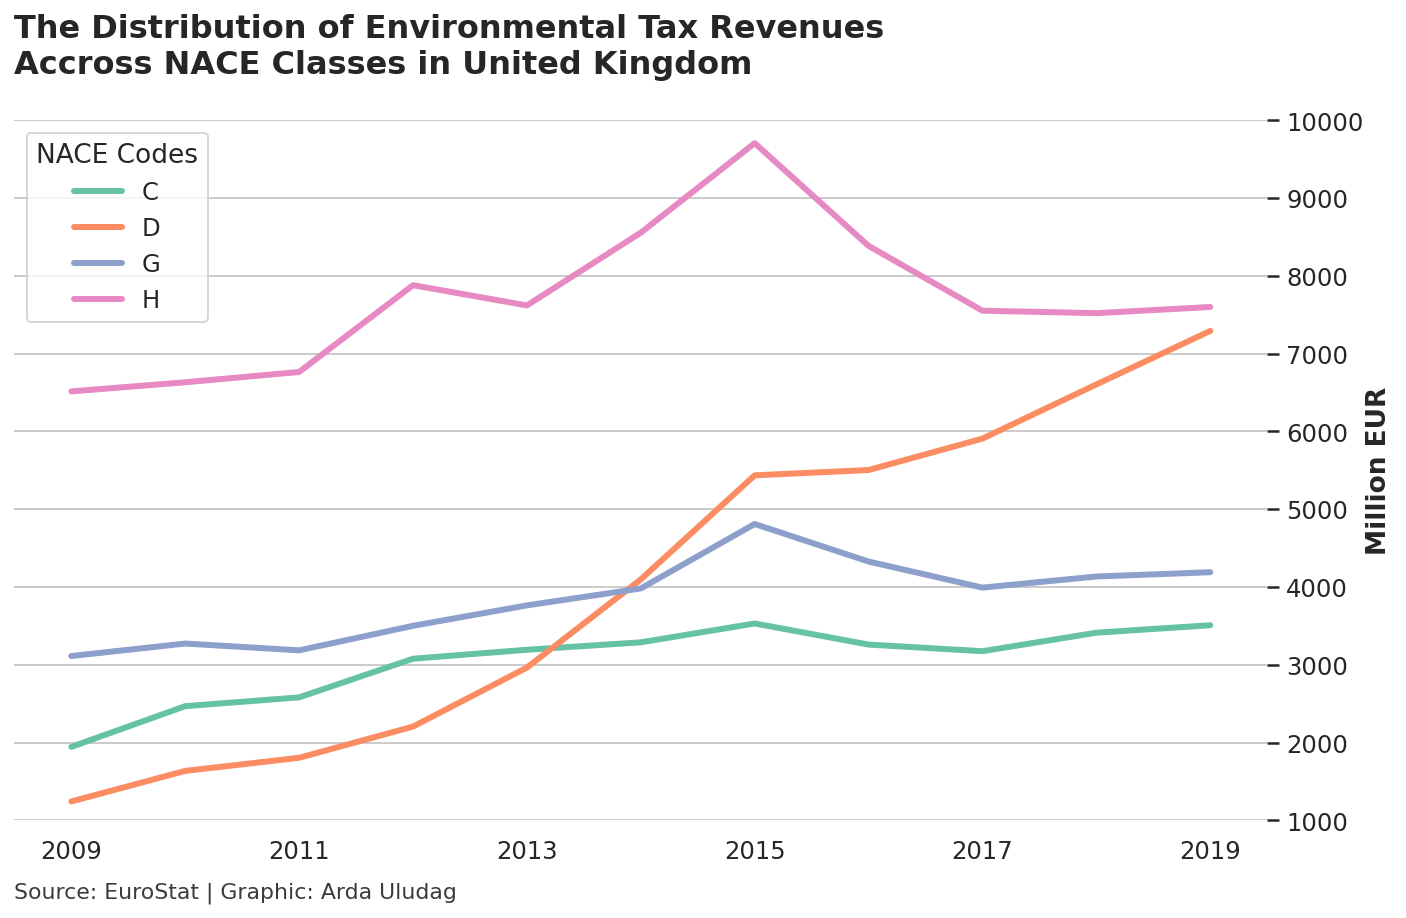

In [70]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.country == 'UK'], 
               index=['year'], 
               columns='nace_r2', 
               values='tax_revenues').plot(kind='line', linewidth=3) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nAccross NACE Classes in United Kingdom", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='NACE Codes')#Naming the legend
ax = plt.gca()
ax.xaxis.grid()
ax.set_ylim(1000,10000)
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, -1, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

Transport and storage are the largest sources of environmental tax revenue in the UK. This area is followed by tax revenues collected from the electricity, gas, steam, and air conditioning supply area, where the fastest increase was experienced in the period. Revenues collected from all areas in the UK in 2019 are higher than in 2009.

Text(-0.5, 0, 'Source: EuroStat | Graphic: Arda Uludag')

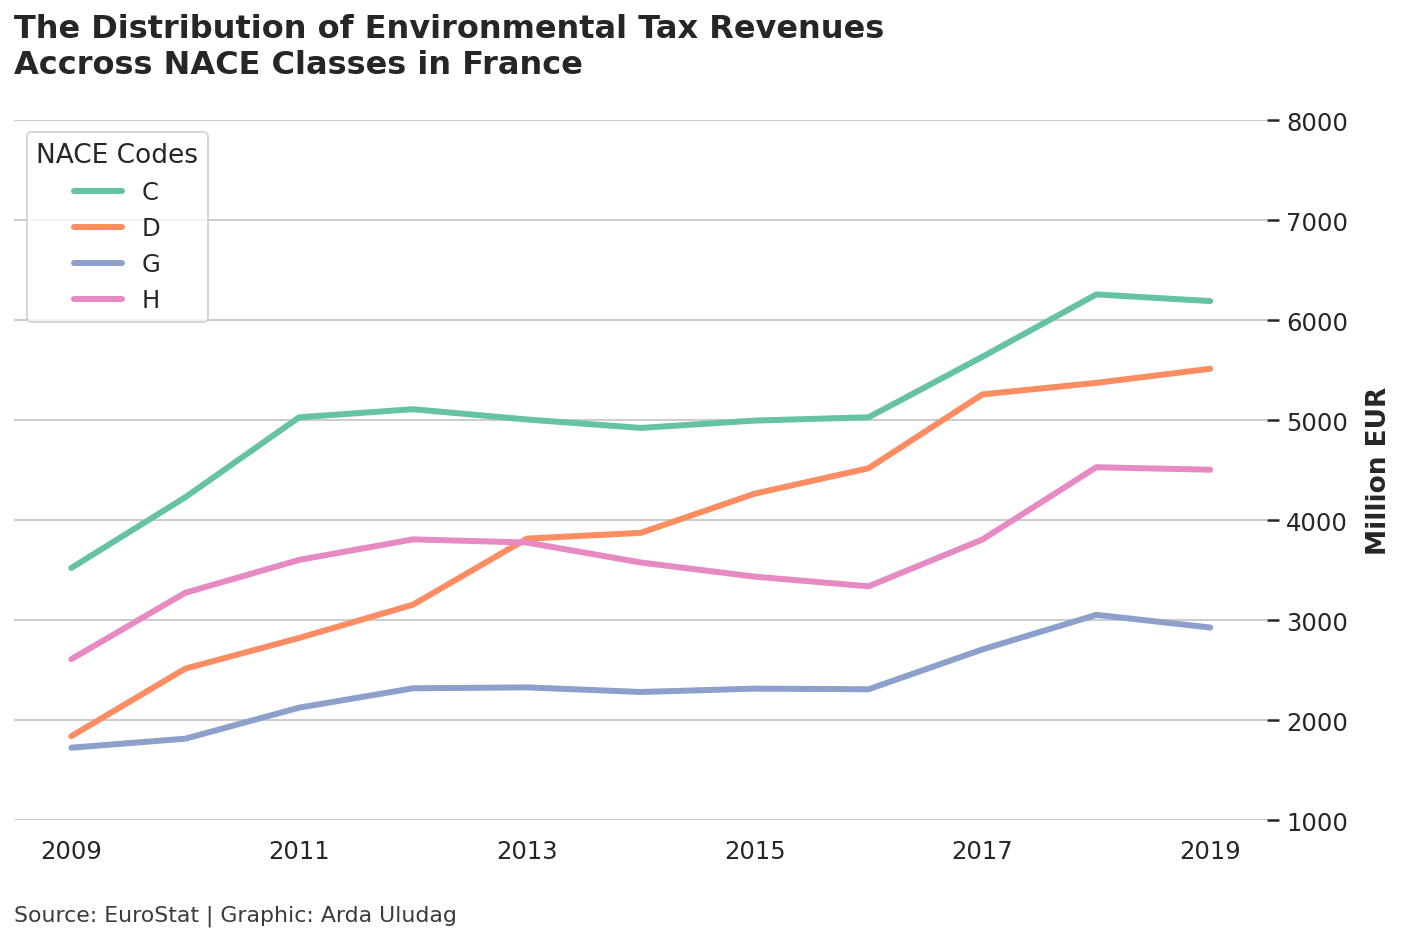

In [71]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.country == 'FR'], 
               index=['year'], 
               columns='nace_r2', 
               values='tax_revenues').plot(kind='line', linewidth=3) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nAccross NACE Classes in France", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='NACE Codes')#Naming the legend
ax = plt.gca()
ax.xaxis.grid()
ax.set_ylim(1000,8000)
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, 0, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

While France gets the most revenue from manufacturing in this period, the least revenue source is wholesale and retail trade. France stands out as having a higher revenue than it started in all areas for 11 years. During this period, the fastest growing environmental tax revenue source is electricity, gas, steam, and air conditioning supply.

Text(-0.5, -1000, 'Source: EuroStat | Graphic: Arda Uludag')

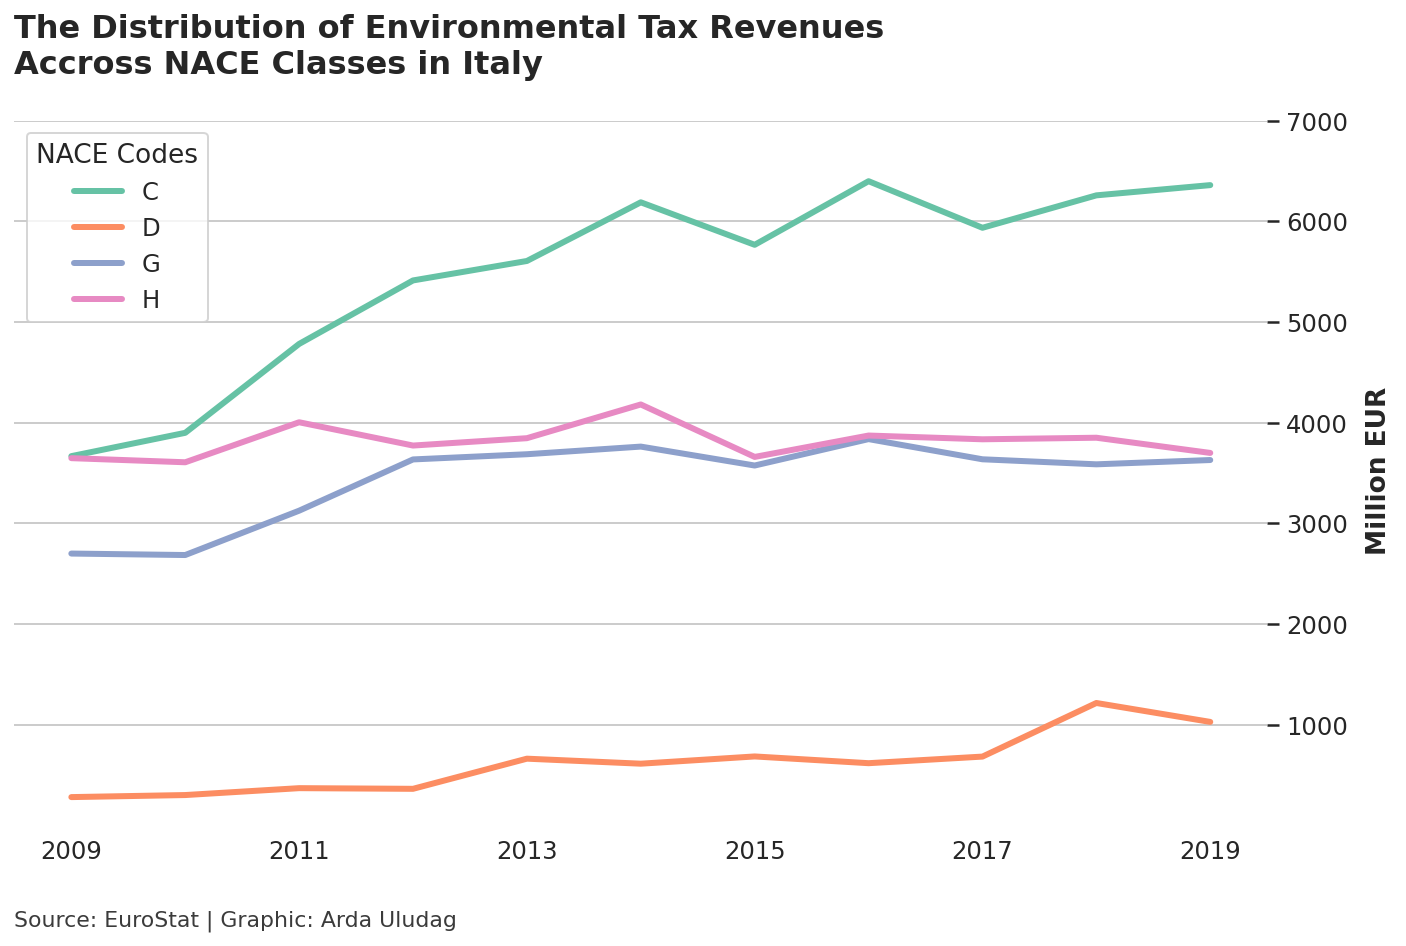

In [72]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.country == 'IT'], 
               index=['year'], 
               columns='nace_r2', 
               values='tax_revenues').plot(kind='line', linewidth=3) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nAccross NACE Classes in Italy", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='NACE Codes')#Naming the legend
ax = plt.gca()
ax.xaxis.grid()
ax.set_ylim(50,7000)
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, -1000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

The highest tax revenue is collected from the manufacturing field in Italy and this field also has the highest increase in the 11 years. The least revenue is obtained from electricity, gas, steam, and air conditioning supply. In other areas, it exhibits a rather horizontal trend.

Text(-0.5, 0, 'Source: EuroStat | Graphic: Arda Uludag')

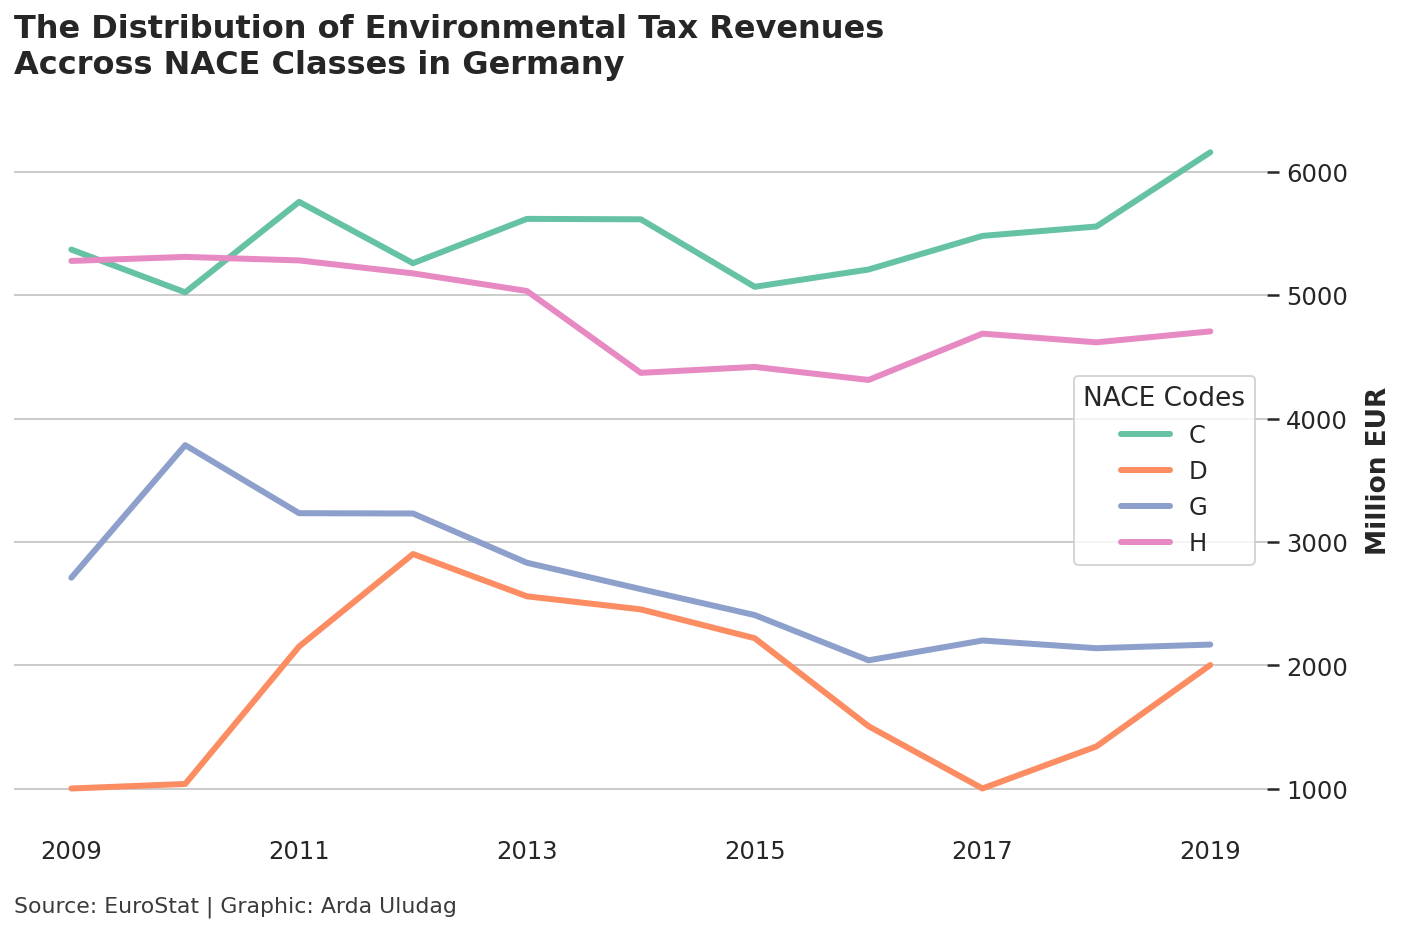

In [73]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.country == 'DE'], 
               index=['year'], 
               columns='nace_r2', 
               values='tax_revenues').plot(kind='line', linewidth=3) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nAccross NACE Classes in Germany", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='NACE Codes')#Naming the legend
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, 0, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

In Germany, the most environmental tax revenue is collected from manufacturing. It is followed by the transport and storage area. In 2009, both fields are very close to each other, while the revenue from transport and storage decreased a little, while the tax revenues collected from the manufacturing field increased significantly. A decrease is also observed in the revenues from wholesale and retail trade. On the other hand, the least revenue item comes from electricity, gas, steam and air conditioning supply. Revenues from these two fields, which had a significant difference between them in 2009, are very close to each other in 2019.

Text(-0.5, -1000, 'Source: EuroStat | Graphic: Arda Uludag')

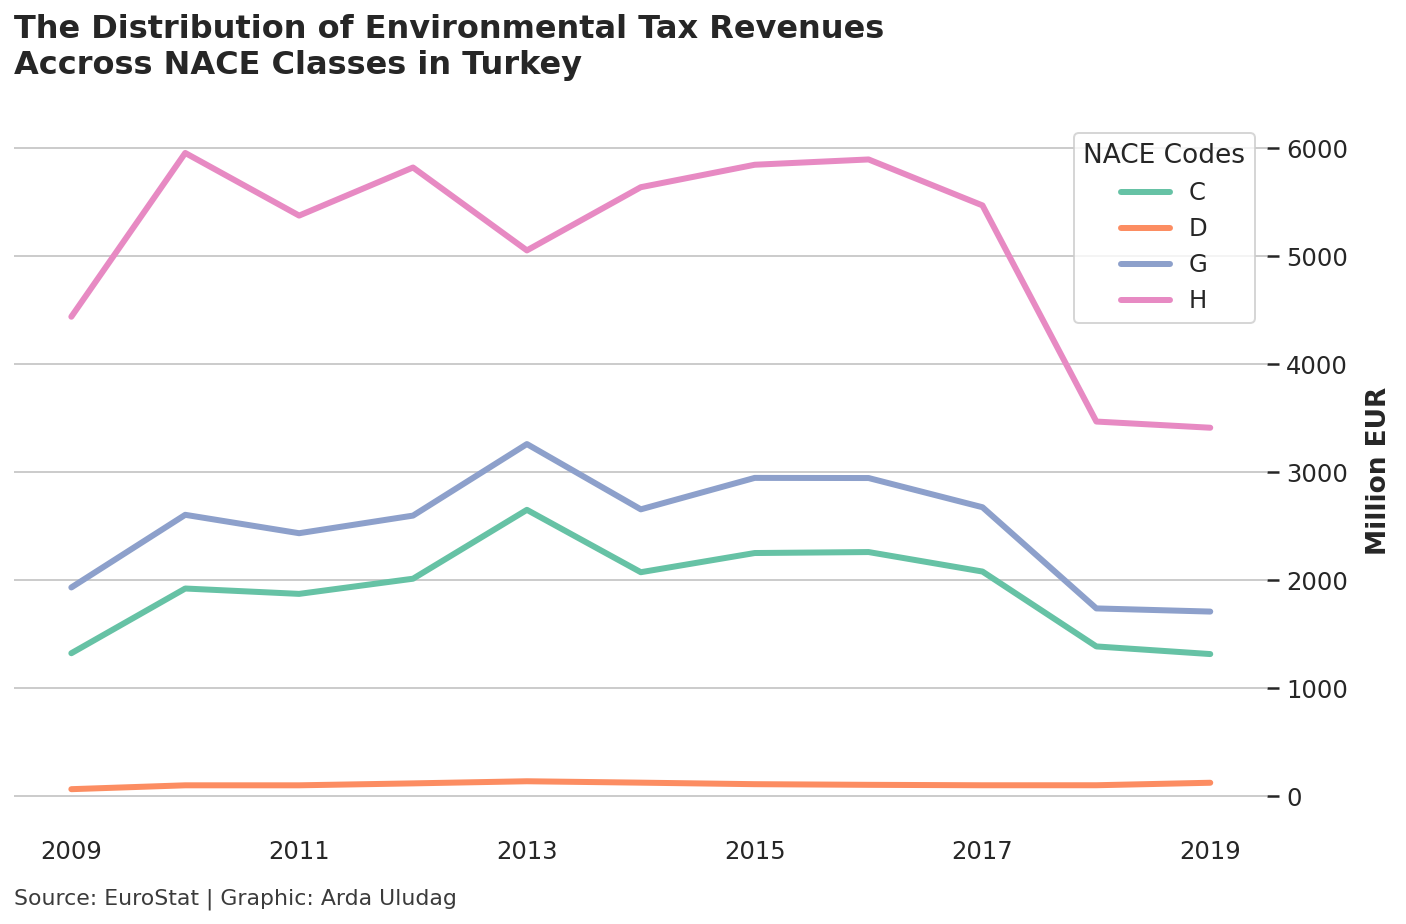

In [74]:
pd.pivot_table(five_countries_to_analyze_2[five_countries_to_analyze_2.country == 'TR'], 
               index=['year'], 
               columns='nace_r2', 
               values='tax_revenues').plot(kind='line', linewidth=3) #Building the pivot table and bar chart
plt.title("The Distribution of Environmental Tax Revenues \nAccross NACE Classes in Turkey", 
          fontsize=16, 
          weight='bold', loc='left', y=1.05) #Naming title
plt.ylabel("Million EUR", weight='bold') #Naming y-label
plt.xlabel("")#Naming x-label
plt.legend(title='NACE Codes')#Naming the legend
ax = plt.gca()
ax.xaxis.grid()
ax.yaxis.set_label_coords(1.10,0.5)
ax.yaxis.tick_right()
plt.box(on=None)
plt.text(-0.5, -1000, 'Source: EuroStat | Graphic: Arda Uludag', ha='left', fontsize = 11, alpha=0.9)

Although Turkey recorded an increase in tax revenues in almost all areas during the period, when we come to 2019, it is at a lower level in almost all areas compared to 2009. It generates the most tax revenue from transportation and storage, it is followed by wholesale and retail trade and manufacturing, which are very close to each other. Turkey earns almost no revenue in the field of electricity, gas, steam, and air conditioning supply. 

As I have mentioned before, this picture is due to the developments in the exchange rate after 2017. Although tax revenues are in TRY, I conducted this analysis concerning the EUR exchange rate. When I look at the income changes in Turkey, it is seen that the decrease in incomes increased the effect of the aforementioned exchange rate shock in 2017. Despite Turkey having suffered a very serious loss of income in EUR terms, it has come to the fore by still being among the top 5 countries.

### Part VII - Fight against climate change needs room to maneuver in budgets

In the 11 years until 2019, when we felt the impact of the pandemic across Europe in the last quarter, we observe that although the revenues from environmental taxes increased slightly, they did not create enough income to make a significant contribution to the national budgets in the fight against climate change.

This exploratory data analysis, which is the first of my studies on the analysis of environmental taxes, is a general introduction to the work I will do on this theme and aims to give a general view of the European-wide environmental taxes.

We are able to say that the 5 countries with the highest income within the scope of the research years outperformed other countries, however, they came to the fore as the outliers with their performance. Although it is possible to say that there has been a slight increase in the minimum tax revenues collected over the 11 years, it is not possible to talk about a serious increase on average.

It is possible to state that the tax source that generates the most revenue is energy taxes, and there has not been a significant increase in the revenues from the taxes collected on transportation, which comes in second place. At this point, it is worth emphasizing that the tax composition is the same in almost all countries.

According to the NACE classifications within the scope of the 5 countries discussed in detail in the review; between 2009 and 2019, the highest environmental tax revenue was generated from transporting and storage. It was followed by manufacturing, wholesale and trade, and electricity, gas, steam, and air conditioning supply.

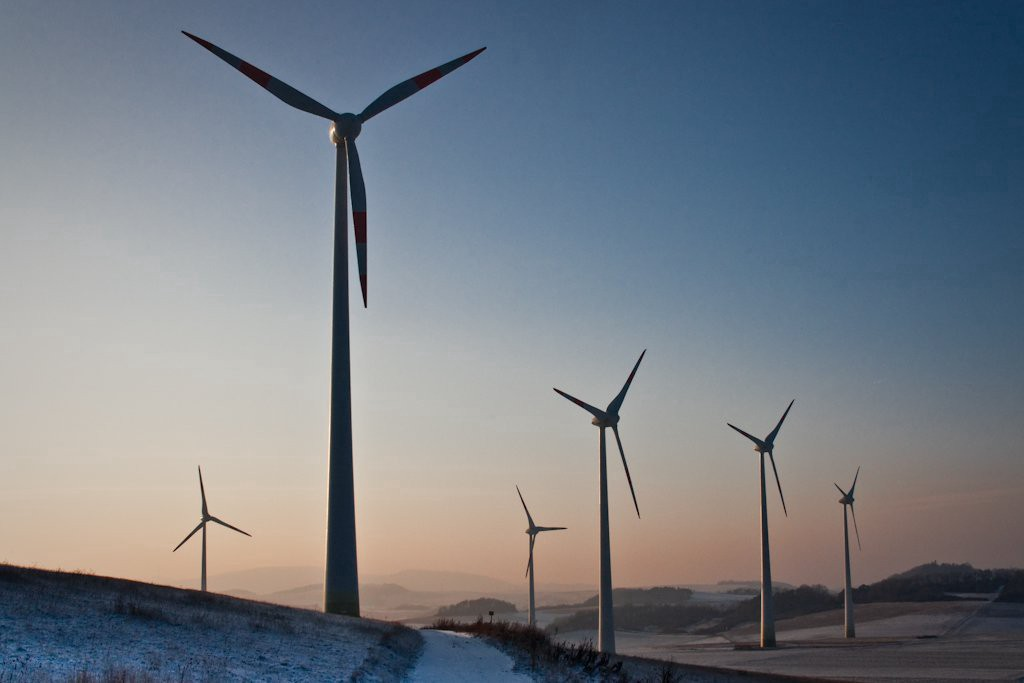

It has been revealed that there are very serious differences between the distributions according to NACE classes among these 5 countries, and it is possible to talk about a separate policy mix for each of them. In addition, although it is not discussed in detail within the scope of the analysis, it should be considered that the exchange rate changes due to the changes in the values of the local currencies against the Euro in countries such as Turkey and the United Kingdom, which do not use the Euro, also play a role in shaping this picture.

Long story short, with the Russia-Ukraine tension, it is expected that there will be a stall in policies focused on climate change. The attitude of the European Union to classify natural gas and nuclear investments as sustainable, increase the use of natural gas, and even reactivate coal power plants that it has closed in line with its climate commitments, even for a short time, is incompatible with climate actions. In addition, we see those environmental taxes, which provide an important room for maneuver in national budgets in the fight against climate change on a national scale, have been reduced in order not to affect fragile households. At this point, it seems possible to say that changing tax compositions without compromising climate action while protecting these households can be positive.